# Trataremos de dar un analisis a la información con el fin de identificar si hay una tendencia a que un producto sea vendido en una epoca especifica del año

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
data = pd.read_excel('/content/gdrive/MyDrive/ventas.xlsx', parse_dates=["FechaVenta"])
data

IdFactura  CodProducto          FechaVenta        Mes   Año  \
0           24075        12182 2018-01-03 00:00:00      enero  2018   
1           24075        12159 2018-01-03 00:00:00      enero  2018   
2           24075        12167 2018-01-03 00:00:00      enero  2018   
3           24075        12468 2018-01-03 00:00:00      enero  2018   
4           24075        10898 2018-01-03 00:00:00      enero  2018   
...           ...          ...                 ...        ...   ...   
105318      63084        10850 2022-12-31 12:09:56  diciembre  2022   
105319      63084        11632 2022-12-31 12:09:56  diciembre  2022   
105320      63084        10363 2022-12-31 12:09:56  diciembre  2022   
105321      63085         9774 2022-12-31 12:13:56  diciembre  2022   
105322      63085         9264 2022-12-31 12:13:56  diciembre  2022   

            HoraVenta  IdCliente                            NomApeCiudCli  \
0                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
1                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
2                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
3                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
4                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
...               ...        ...                                      ...   
105318  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105319  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105320  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105321  12:13:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105322  12:13:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   

        Ciudad      NomApeEmp  ... CategoriaProducto Cantidad PrecioDet  \
0       Bogota  PAOLA RUBIANO  ...       TORNILLERIA    400.0       160   
1       Bogota  PAOLA RUBIANO  ...          PINTURAS      1.0      5000   
2       Bogota  PAOLA RUBIANO  ...           DRYWALL      4.0      4700   
3       Bogota  PAOLA RUBIANO  ...          PLOMERIA      2.0      7000   
4       Bogota  PAOLA RUBIANO  ...   TUBERIA PRESION      3.0       800   
...        ...            ...  ...               ...      ...       ...   
105318  Bogota  PAOLA RUBIANO  ...   TUBERIA PRESION      1.0       700   
105319  Bogota  PAOLA RUBIANO  ...        ELECTRICOS      1.0      3000   
105320  Bogota  PAOLA RUBIANO  ...          PLOMERIA      1.0     19500   
105321  Bogota  PAOLA RUBIANO  ...            CINTAS      1.0      1000   
105322  Bogota  PAOLA RUBIANO  ...          PLOMERIA      1.0      4000   

       IvaDet DescuentoDet       VlrIva  VlrDescuento  VlrAPagar  \
0           0            0     0.000000             0    64000.0   
1           0            0     0.000000             0     5000.0   
2           0            0     0.000000             0    18800.0   
3           0            0     0.000000             0    14000.0   
4          16            0   331.034483             0     2400.0   
...       ...          ...          ...           ...        ...   
105318     16            0    96.551724             0      700.0   
105319     16            0   413.793103             0     3000.0   
105320     16            0  2689.655172             0    19500.0   
105321     16            0   137.931034             0     1000.0   
105322     16            0   551.724138             0     4000.0   

        PrecioCompraDet      Utilidad  
0                   112  19200.000000  
1                  2988   2012.000000  
2                  4000   2800.000000  
3                  4875   4250.000000  
4                   398    874.965517  
...                 ...           ...  
105318              376    227.448276  
105319             2200    386.206897  
105320            14093   2717.344828  
105321              583    279.068966  
105322             2649    799.275862  

[105323 rows x 25 columns]

#### Tomamos nuevamente la primera palabra de cada producto para reducir cardinalidad

In [3]:
data['Producto'] = data.NomProducto.str.split().str.get(0)
data = data.drop('NomProducto', axis=1)
data

IdFactura  CodProducto          FechaVenta        Mes   Año  \
0           24075        12182 2018-01-03 00:00:00      enero  2018   
1           24075        12159 2018-01-03 00:00:00      enero  2018   
2           24075        12167 2018-01-03 00:00:00      enero  2018   
3           24075        12468 2018-01-03 00:00:00      enero  2018   
4           24075        10898 2018-01-03 00:00:00      enero  2018   
...           ...          ...                 ...        ...   ...   
105318      63084        10850 2022-12-31 12:09:56  diciembre  2022   
105319      63084        11632 2022-12-31 12:09:56  diciembre  2022   
105320      63084        10363 2022-12-31 12:09:56  diciembre  2022   
105321      63085         9774 2022-12-31 12:13:56  diciembre  2022   
105322      63085         9264 2022-12-31 12:13:56  diciembre  2022   

            HoraVenta  IdCliente                            NomApeCiudCli  \
0                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
1                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
2                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
3                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
4                 NaN        859  DESIGN & CO SAS C. CTO TAKAMI ( Bogota)   
...               ...        ...                                      ...   
105318  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105319  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105320  12:09:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105321  12:13:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   
105322  12:13:56 p.m.          5               PUBLICO GENERAL  ( Bogota)   

        Ciudad      NomApeEmp  ... Cantidad PrecioDet IvaDet DescuentoDet  \
0       Bogota  PAOLA RUBIANO  ...    400.0       160      0            0   
1       Bogota  PAOLA RUBIANO  ...      1.0      5000      0            0   
2       Bogota  PAOLA RUBIANO  ...      4.0      4700      0            0   
3       Bogota  PAOLA RUBIANO  ...      2.0      7000      0            0   
4       Bogota  PAOLA RUBIANO  ...      3.0       800     16            0   
...        ...            ...  ...      ...       ...    ...          ...   
105318  Bogota  PAOLA RUBIANO  ...      1.0       700     16            0   
105319  Bogota  PAOLA RUBIANO  ...      1.0      3000     16            0   
105320  Bogota  PAOLA RUBIANO  ...      1.0     19500     16            0   
105321  Bogota  PAOLA RUBIANO  ...      1.0      1000     16            0   
105322  Bogota  PAOLA RUBIANO  ...      1.0      4000     16            0   

             VlrIva  VlrDescuento  VlrAPagar  PrecioCompraDet      Utilidad  \
0          0.000000             0    64000.0              112  19200.000000   
1          0.000000             0     5000.0             2988   2012.000000   
2          0.000000             0    18800.0             4000   2800.000000   
3          0.000000             0    14000.0             4875   4250.000000   
4        331.034483             0     2400.0              398    874.965517   
...             ...           ...        ...              ...           ...   
105318    96.551724             0      700.0              376    227.448276   
105319   413.793103             0     3000.0             2200    386.206897   
105320  2689.655172             0    19500.0            14093   2717.344828   
105321   137.931034             0     1000.0              583    279.068966   
105322   551.724138             0     4000.0             2649    799.275862   

         Producto  
0        TORNILLO  
1         RODILLO  
2       DILATADOR  
3        FLOTADOR  
4             TEE  
...           ...  
105318      TAPON  
105319     PRENSA  
105320    VASTAGO  
105321      CINTA  
105322     ACOPLE  

[105323 rows x 25 columns]

#### Ahora nuestro dataset sera de Clientes, productos y cantidad junto con los datos de las fechas


In [4]:
data['Cliente'] = data['NomApeCiudCli']
cluster_data = data[['FechaVenta', 'Producto', 'Cantidad', ]]
cluster_data['year'] = cluster_data['FechaVenta'].dt.year
cluster_data['month'] = cluster_data['FechaVenta'].dt.month
cluster_data['weekday'] = cluster_data['FechaVenta'].dt.weekday
cluster_data['day'] = cluster_data['FechaVenta'].dt.day
cluster_data['hour'] = cluster_data['FechaVenta'].dt.hour
cluster_data['date'] = cluster_data['FechaVenta'].dt.date
cluster_data

<ipython-input-4-3372d8a5c8ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['year'] = cluster_data['FechaVenta'].dt.year
<ipython-input-4-3372d8a5c8ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['month'] = cluster_data['FechaVenta'].dt.month
<ipython-input-4-3372d8a5c8ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

FechaVenta   Producto  Cantidad  year  month  weekday  day  \
0      2018-01-03 00:00:00   TORNILLO     400.0  2018      1        2    3   
1      2018-01-03 00:00:00    RODILLO       1.0  2018      1        2    3   
2      2018-01-03 00:00:00  DILATADOR       4.0  2018      1        2    3   
3      2018-01-03 00:00:00   FLOTADOR       2.0  2018      1        2    3   
4      2018-01-03 00:00:00        TEE       3.0  2018      1        2    3   
...                    ...        ...       ...   ...    ...      ...  ...   
105318 2022-12-31 12:09:56      TAPON       1.0  2022     12        5   31   
105319 2022-12-31 12:09:56     PRENSA       1.0  2022     12        5   31   
105320 2022-12-31 12:09:56    VASTAGO       1.0  2022     12        5   31   
105321 2022-12-31 12:13:56      CINTA       1.0  2022     12        5   31   
105322 2022-12-31 12:13:56     ACOPLE       1.0  2022     12        5   31   

        hour        date  
0          0  2018-01-03  
1          0  2018-01-03  
2          0  2018-01-03  
3          0  2018-01-03  
4          0  2018-01-03  
...      ...         ...  
105318    12  2022-12-31  
105319    12  2022-12-31  
105320    12  2022-12-31  
105321    12  2022-12-31  
105322    12  2022-12-31  

[105323 rows x 9 columns]

#### Hacemos un filtro por productos pequeños que se venden en grandes cantidades con el fin de visualizar los productos relevantes

In [5]:
info = cluster_data[~cluster_data['Producto'].isin(['TORNILLO', 'CHAZO', 'ARANDELA', 'REMACHE', 'TUERCA', 'LADRILLO', 'Tornillo', 'TORNillo', 'PUNTILLA', 'CABLE', 'LONAS']) ] \
  .groupby(['year', 'month', 'day', 'Producto'])['Cantidad'].sum().reset_index().sort_values(by=['year', 'month', 'day', 'Cantidad'], ascending=[True, True, True, False])
info

year  month  day  Producto  Cantidad
60     2018      1    3  TACHUELA     100.0
36     2018      1    3      LIJA      44.0
22     2018      1    3      CODO      23.0
5      2018      1    3     ARENA      20.0
45     2018      1    3     PUNTA      18.0
...     ...    ...  ...       ...       ...
59269  2022     12   31     TAPON       1.0
59270  2022     12   31      TOMA       1.0
59271  2022     12   31    VARSOL       1.0
59272  2022     12   31   VASTAGO       1.0
59273  2022     12   31    VINILO       1.0

[59274 rows x 5 columns]

### TOP de productos por AÑO

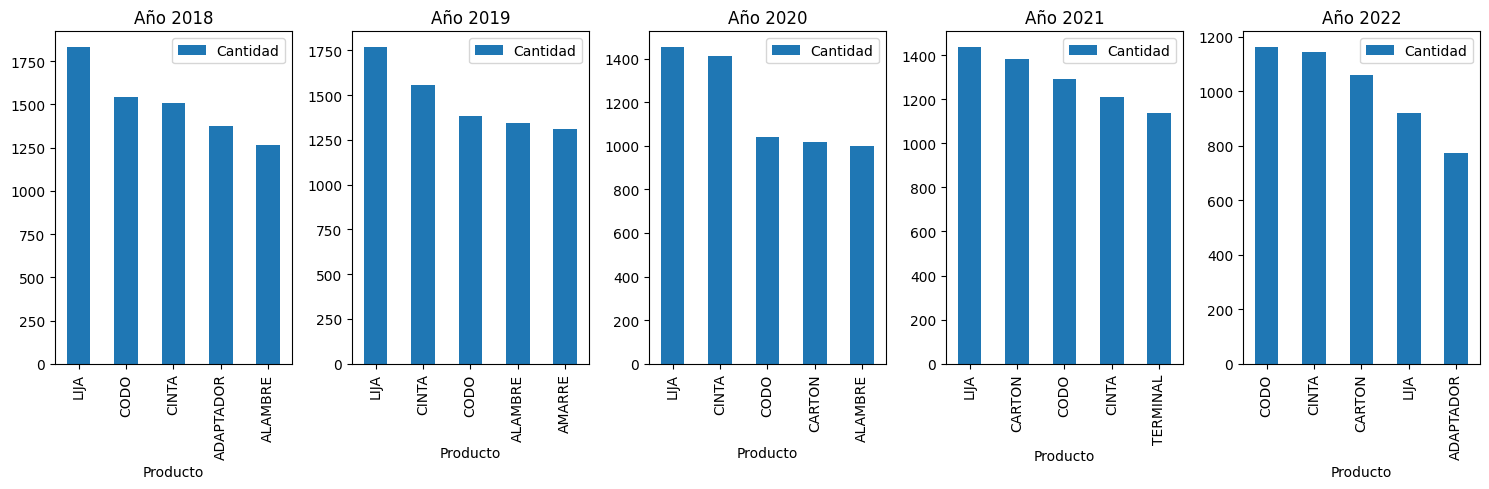

In [6]:

top5 = []
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axe = axes.ravel()
i= 0
for year in info['year'].unique():
    top = info[info['year'] == year] \
    .groupby(['year','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','Cantidad'], ascending=[True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Año {year}')
    i+=1

plt.tight_layout()

### TOP de productos por MES

In [7]:
top5=[]
d = info.groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True,True, False])[['year', 'month', 'Producto', 'Cantidad']]

for year in d['year'].unique():
  for month in d['month'].unique():
    top = d[(d['month'] == month) & (d['year'] == year)].head(5)
    top5.append(top)

top5 =pd.concat(top5, ignore_index=True)
top5

year  month   Producto  Cantidad
0    2018      1       CODO    209.00
1    2018      1       TUBO    198.17
2    2018      1  ADAPTADOR    166.00
3    2018      1       LIJA    137.50
4    2018      1       SOGA    136.00
..    ...    ...        ...       ...
295  2022     12       CODO    144.00
296  2022     12      CINTA    105.00
297  2022     12       PLUG     96.00
298  2022     12  ADAPTADOR     94.00
299  2022     12       TUBO     87.30

[300 rows x 4 columns]

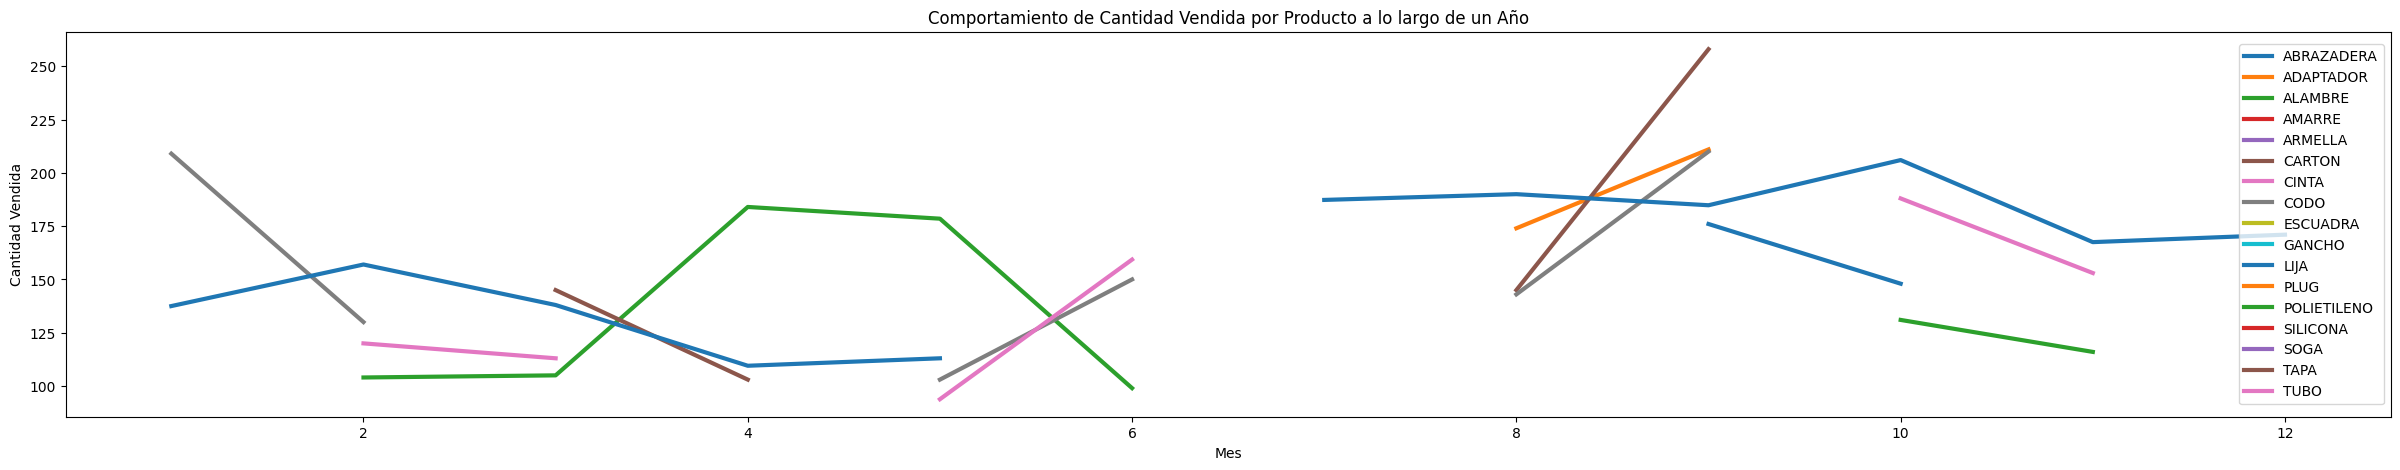

In [8]:
gra=top5[top5['year'] == 2018]
df_pivot = gra.pivot(index='Producto', columns='month', values='Cantidad')


fig, ax = plt.subplots(figsize=(30, 5))

for product in df_pivot.index:
    ax.plot(df_pivot.columns, df_pivot.loc[product], label=product, linewidth=3)

ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Comportamiento de Cantidad Vendida por Producto a lo largo de un Año')
ax.legend(loc='right')
plt.show()

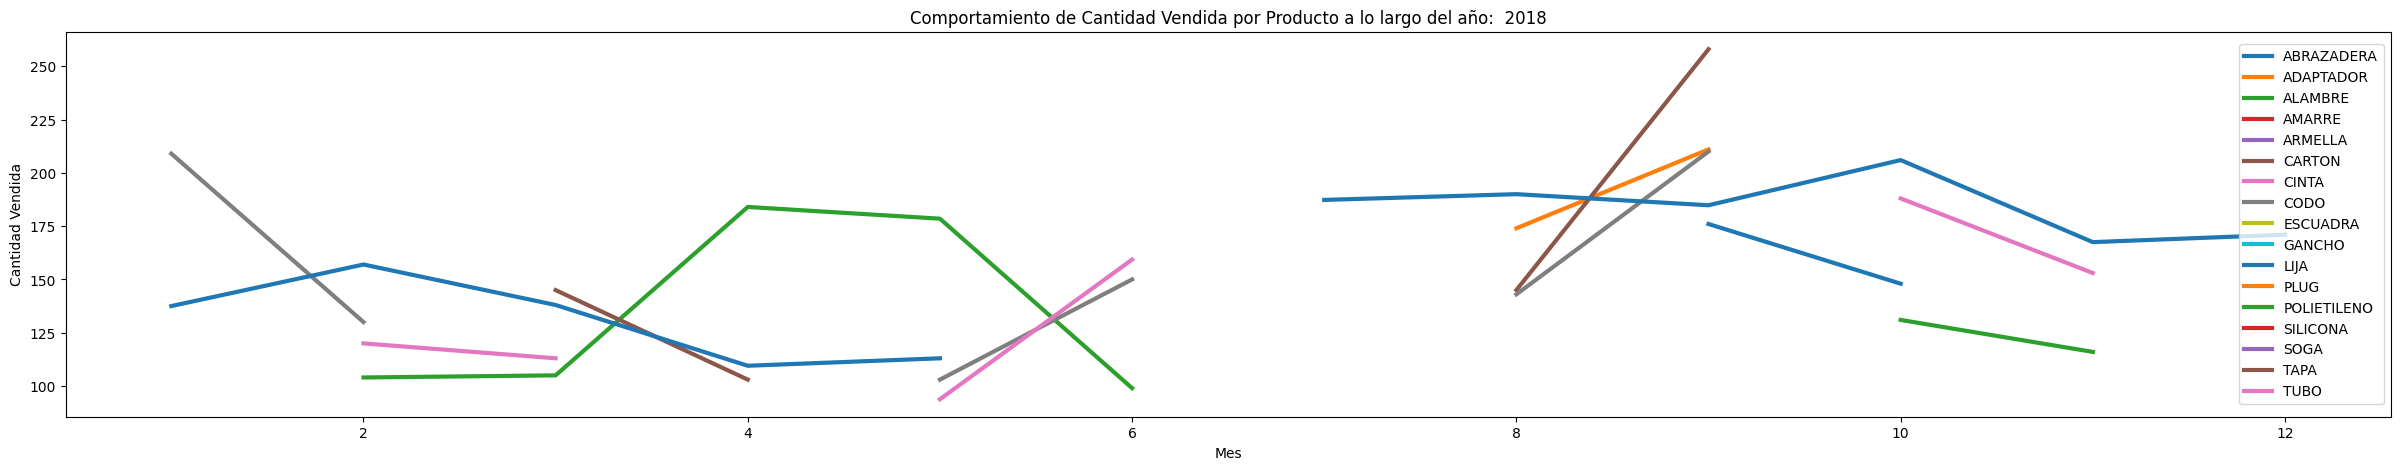

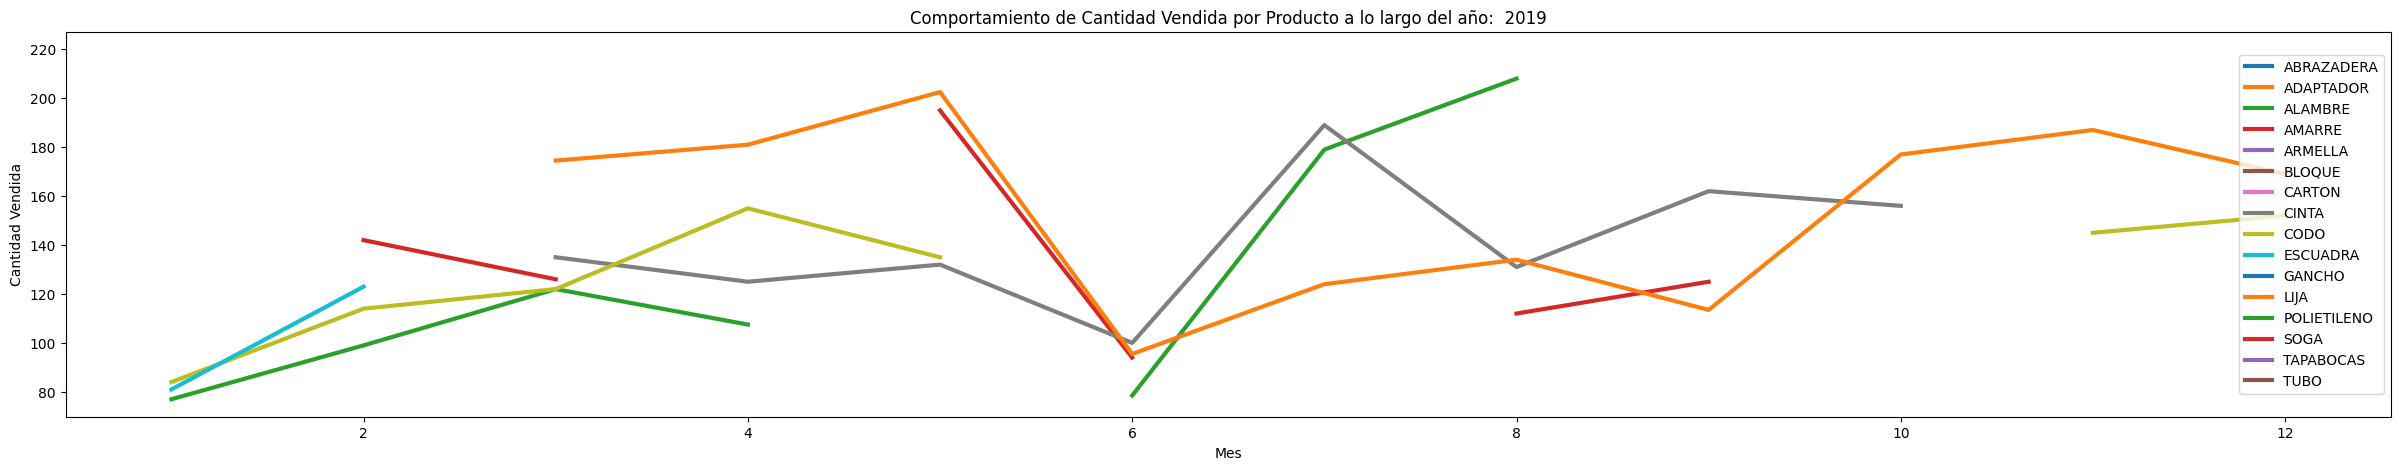

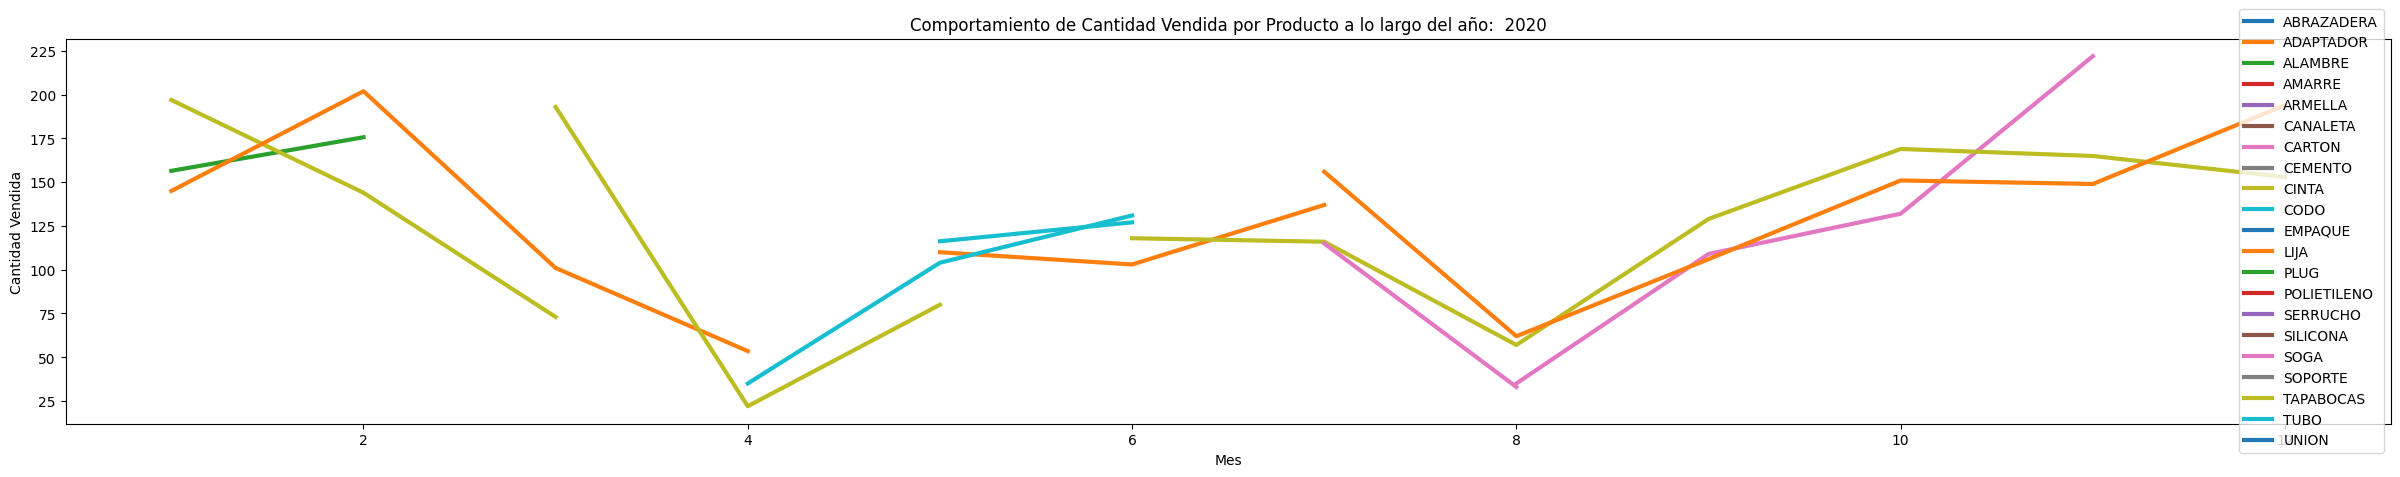

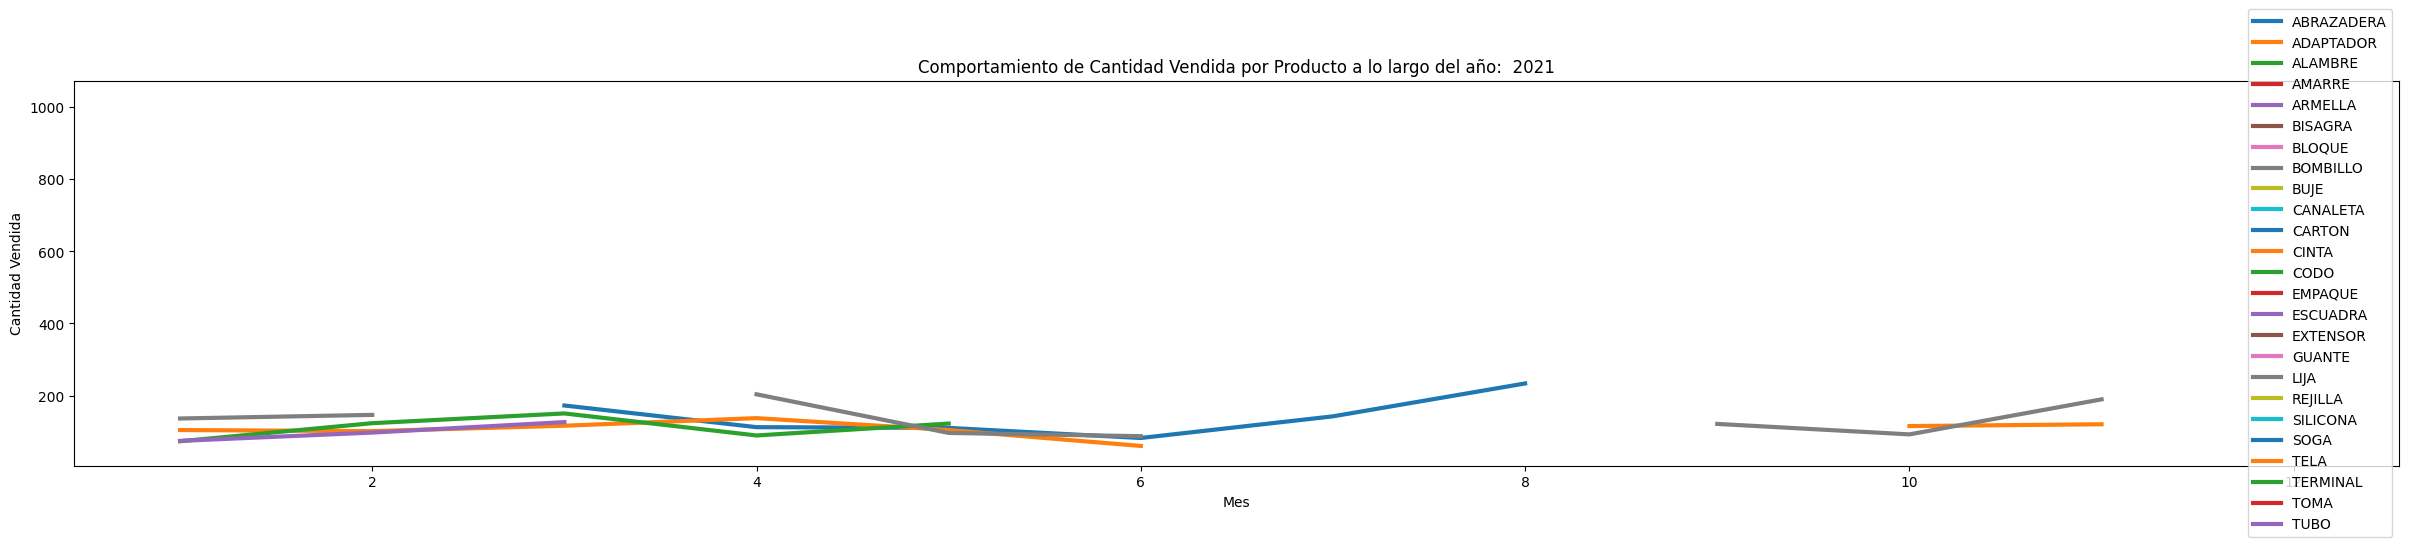

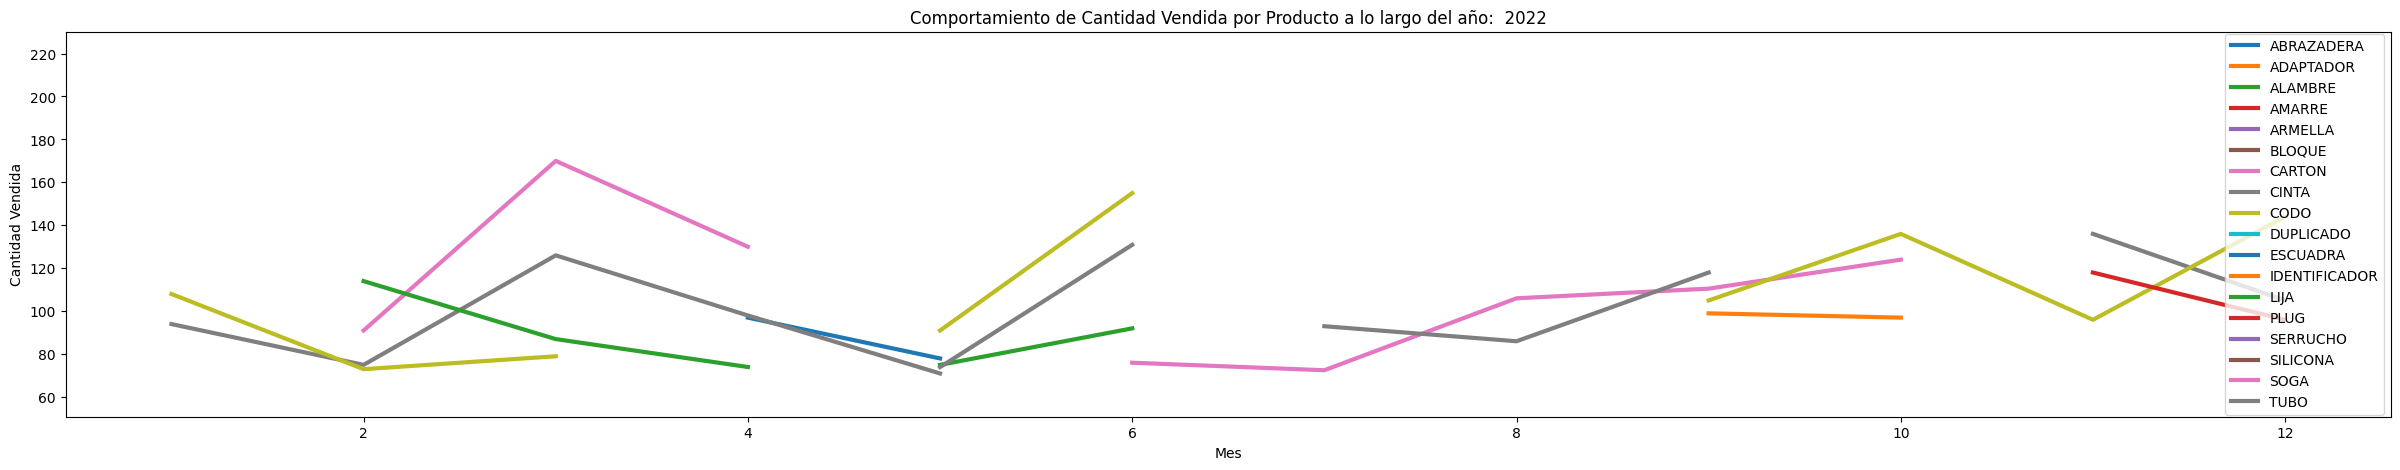

In [9]:
for i in top5['year'].unique():
  gra=top5[top5['year'] == i]
  df_pivot = gra.pivot(index='Producto', columns='month', values='Cantidad')


  fig, ax = plt.subplots(figsize=(30, 5))

  for product in df_pivot.index:
      ax.plot(df_pivot.columns, df_pivot.loc[product], label=product,linewidth=3)

  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad Vendida')
  ax.set_title(f'Comportamiento de Cantidad Vendida por Producto a lo largo del año:  {i}')
  ax.legend(loc='right')
  plt.show()

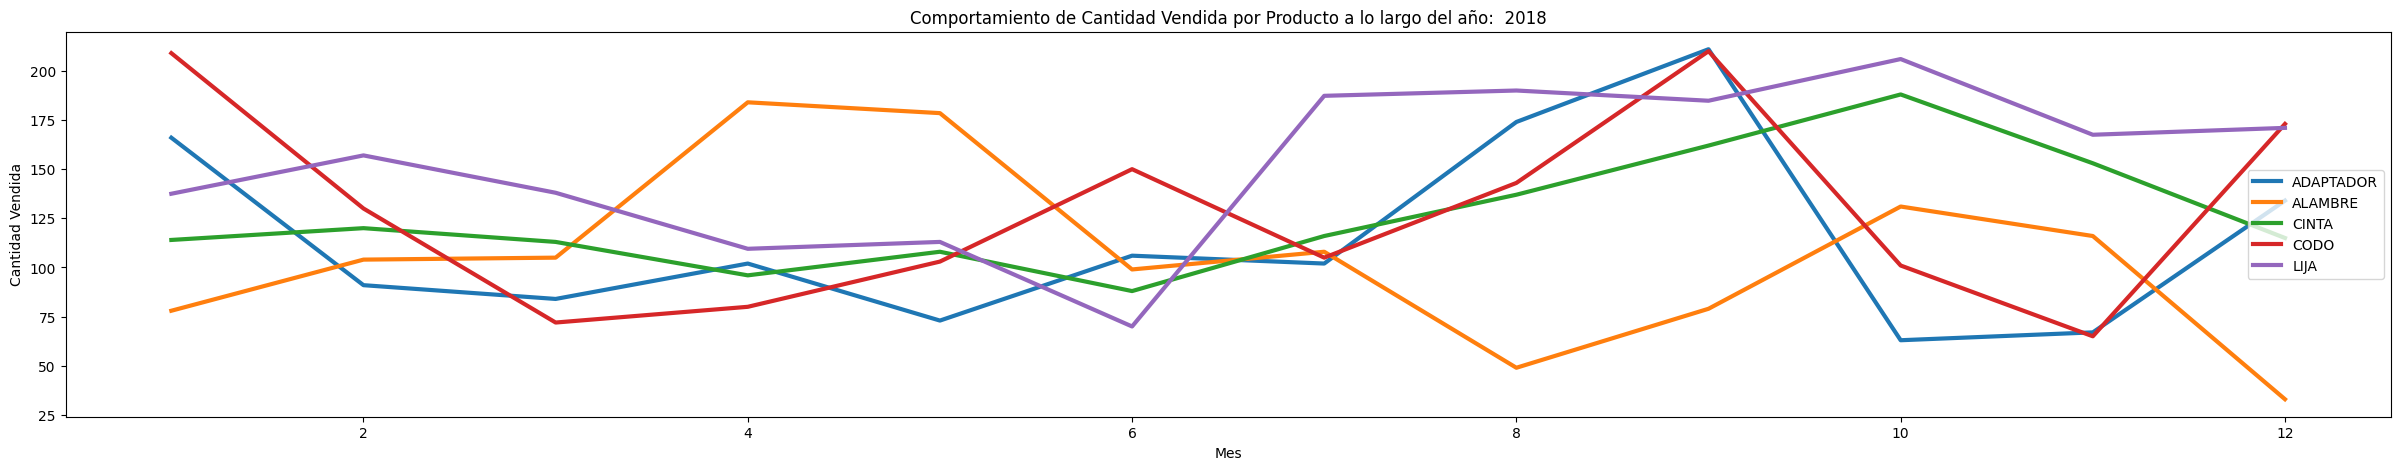

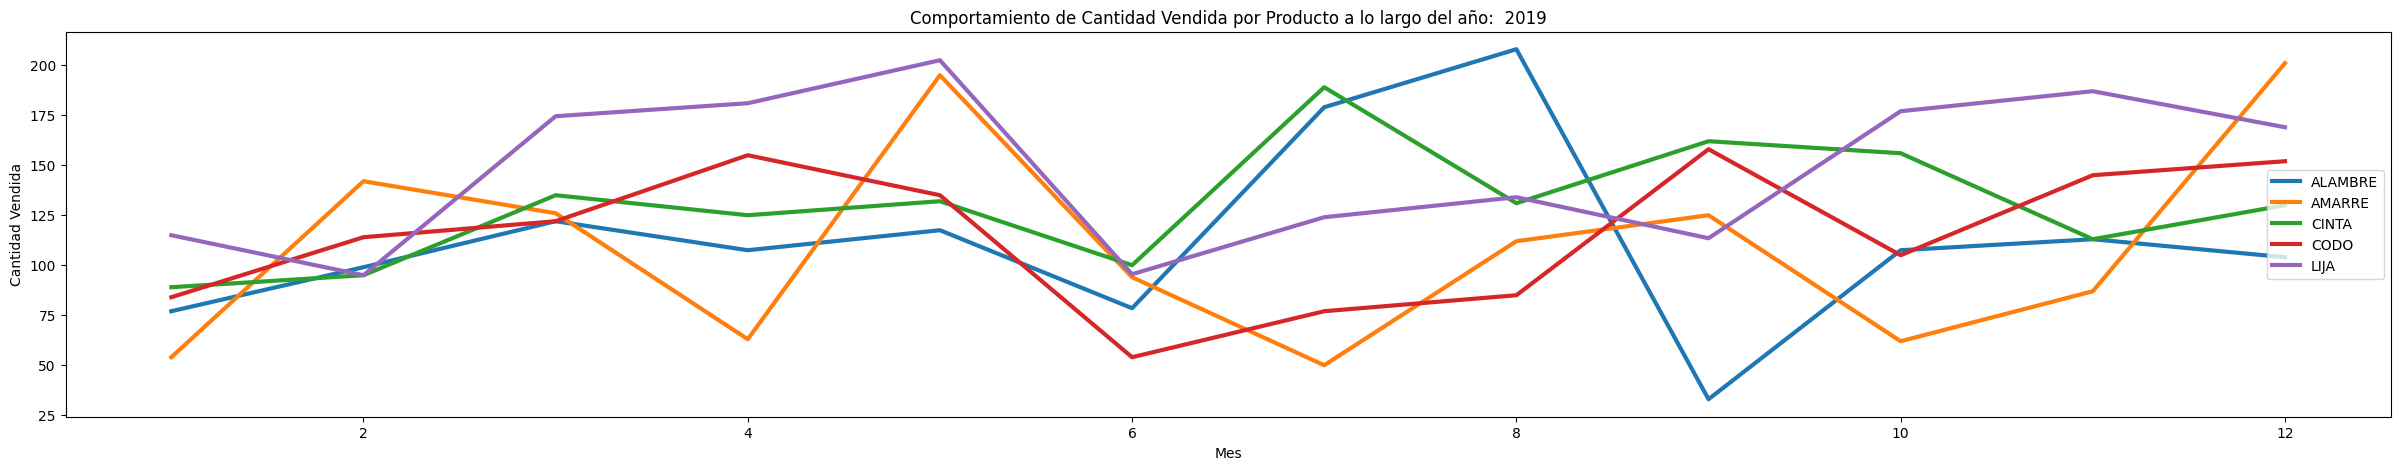

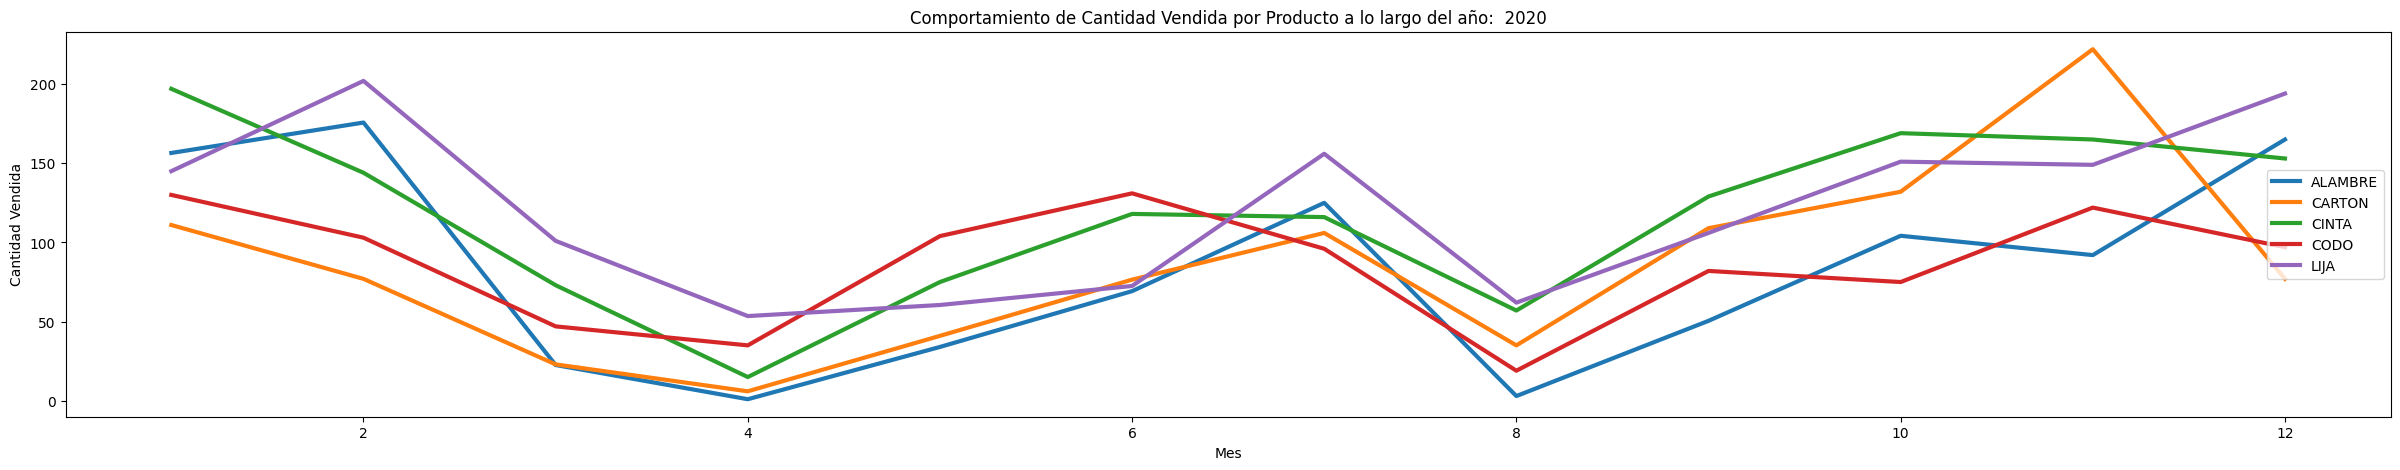

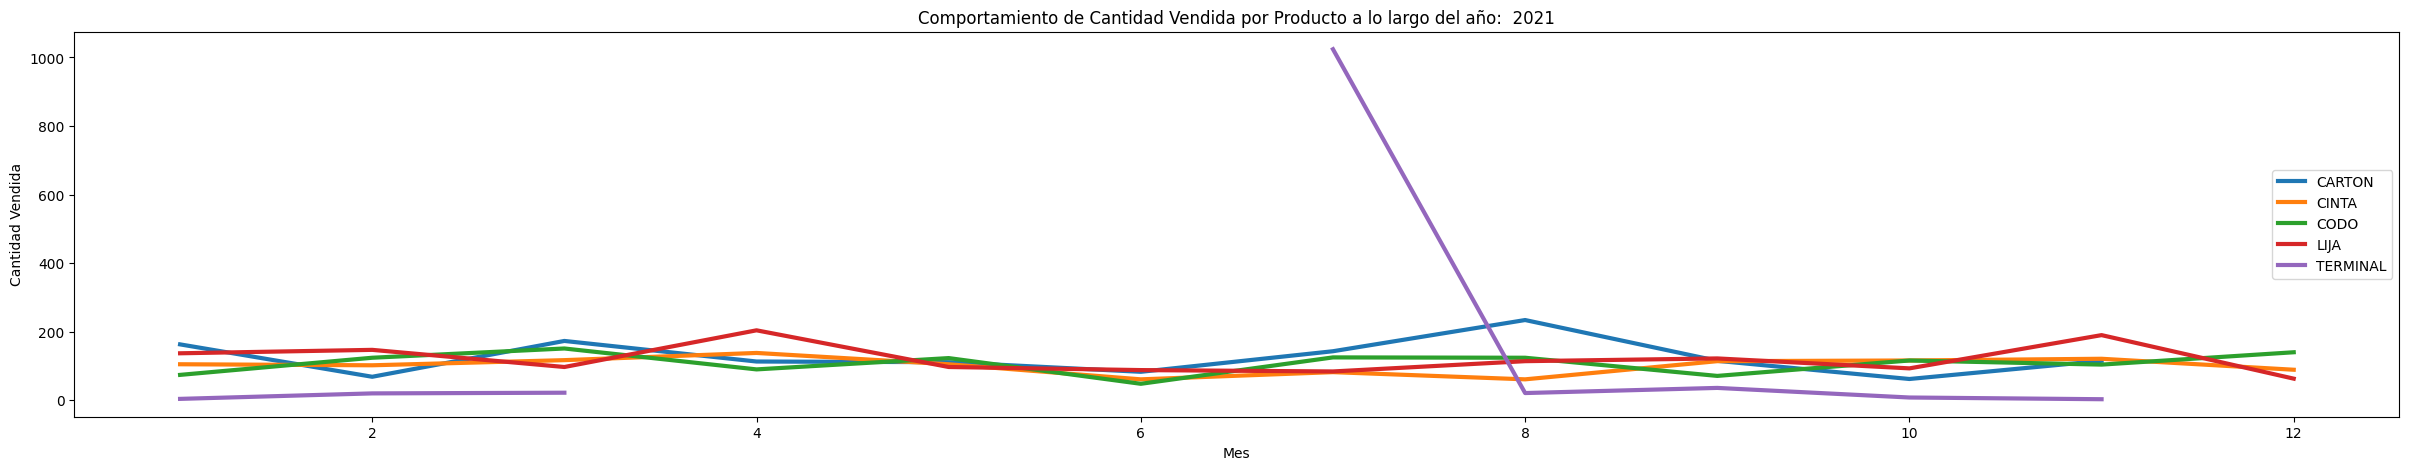

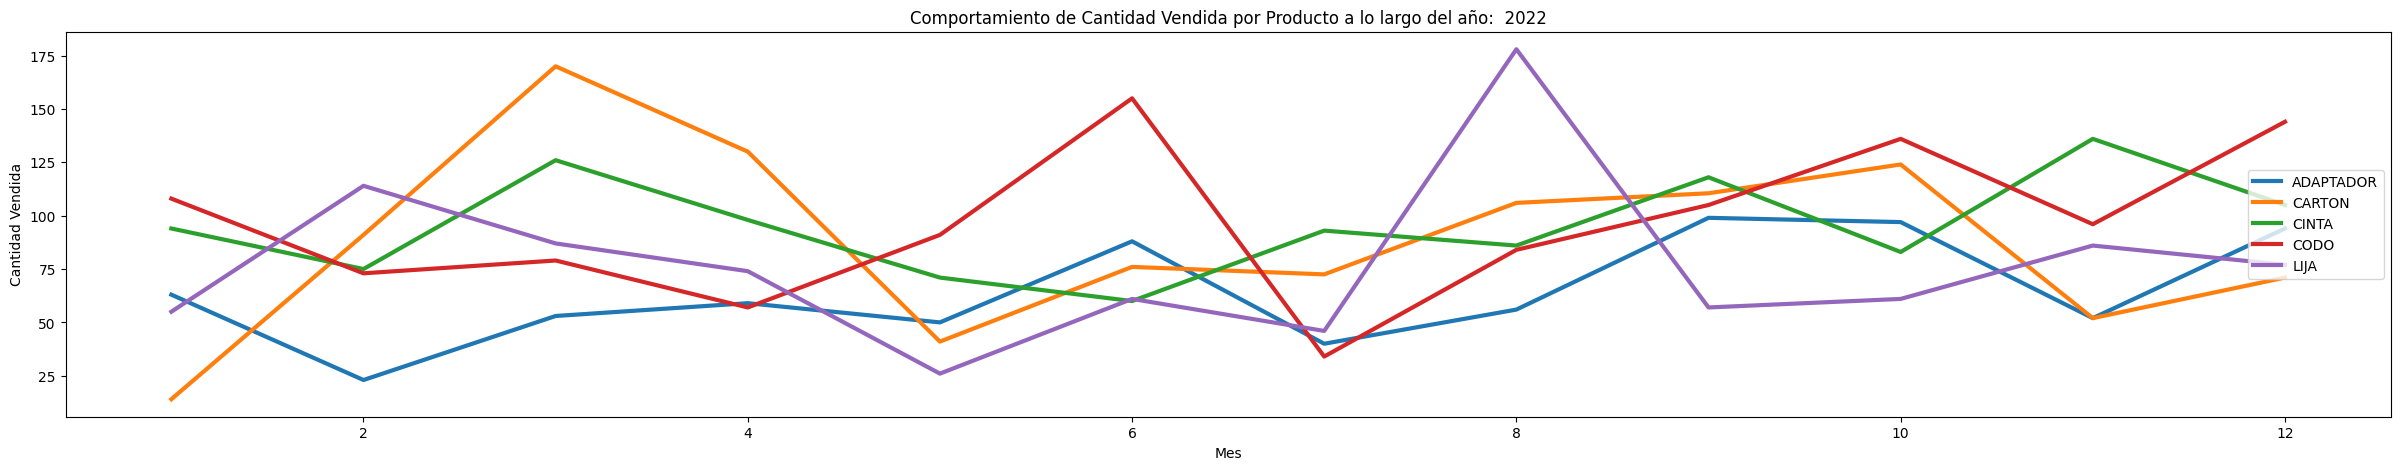

In [10]:
for i in d['year'].unique():
  graph=d[d['year'] == i].groupby(['Producto'])['Cantidad'].sum().reset_index().sort_values(by='Cantidad', ascending=False)['Producto'].head(5)
  gra=d[(d['year'] == i)&(d['Producto'].isin(graph))]
  df_pivot = gra.pivot(index='Producto', columns='month', values='Cantidad')
  fig, ax = plt.subplots(figsize=(30, 5))

  for product in df_pivot.index:
      ax.plot(df_pivot.columns, df_pivot.loc[product], label=product, linewidth=3)

  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad Vendida')
  ax.set_title(f'Comportamiento de Cantidad Vendida por Producto a lo largo del año:  {i}')
  ax.legend(loc='right')
  plt.show()

In [11]:
info = cluster_data[~cluster_data['Producto'].isin(['TORNILLO', 'CHAZO', 'ARANDELA', 'REMACHE', 'TUERCA', 'LADRILLO', 'Tornillo', 'TORNillo', 'PUNTILLA', 'CABLE', 'LONAS']) ] \
  .groupby(['year', 'month', 'day', 'Producto'])['Cantidad'].sum().reset_index().sort_values(by=['year', 'month', 'day', 'Cantidad'], ascending=[True, True, True, False])
info

year  month  day  Producto  Cantidad
60     2018      1    3  TACHUELA     100.0
36     2018      1    3      LIJA      44.0
22     2018      1    3      CODO      23.0
5      2018      1    3     ARENA      20.0
45     2018      1    3     PUNTA      18.0
...     ...    ...  ...       ...       ...
59269  2022     12   31     TAPON       1.0
59270  2022     12   31      TOMA       1.0
59271  2022     12   31    VARSOL       1.0
59272  2022     12   31   VASTAGO       1.0
59273  2022     12   31    VINILO       1.0

[59274 rows x 5 columns]

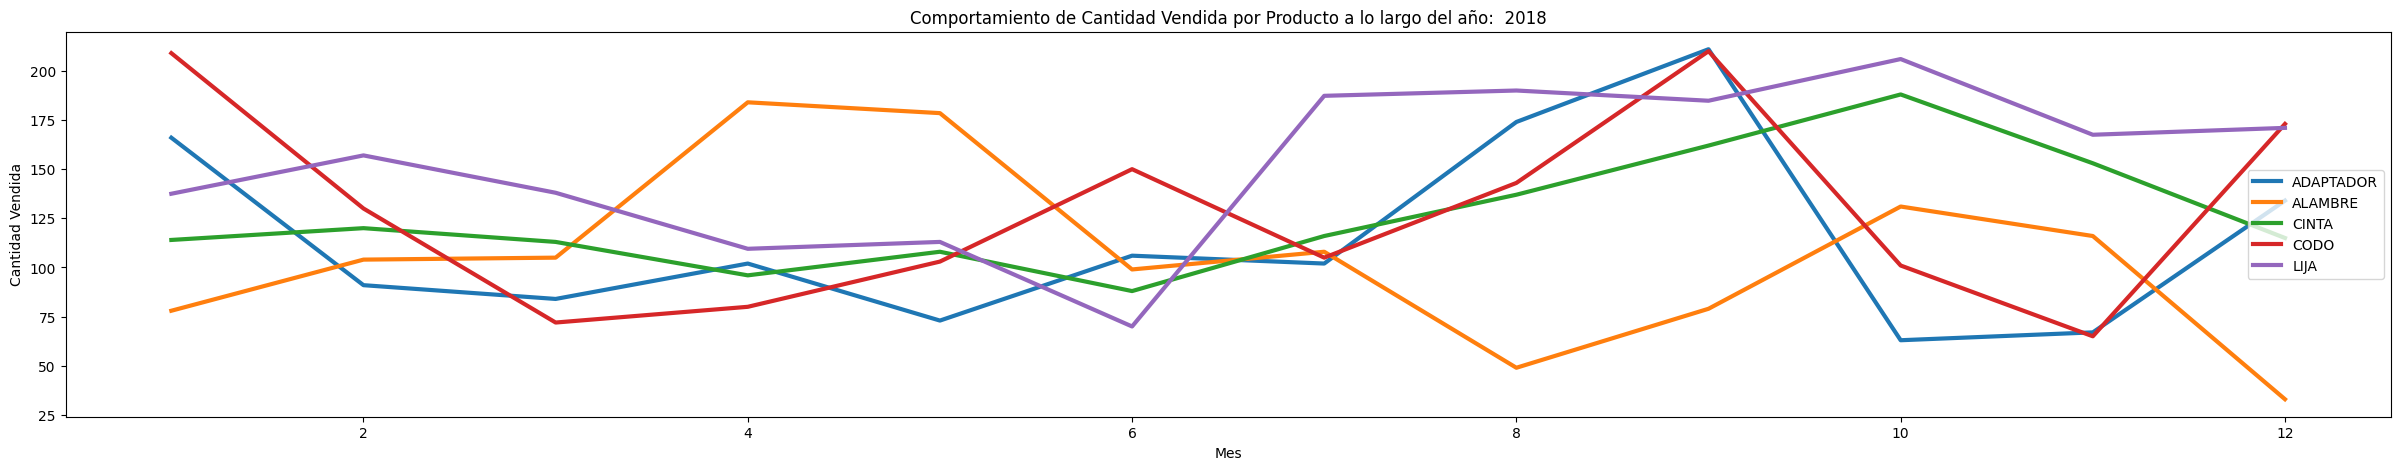

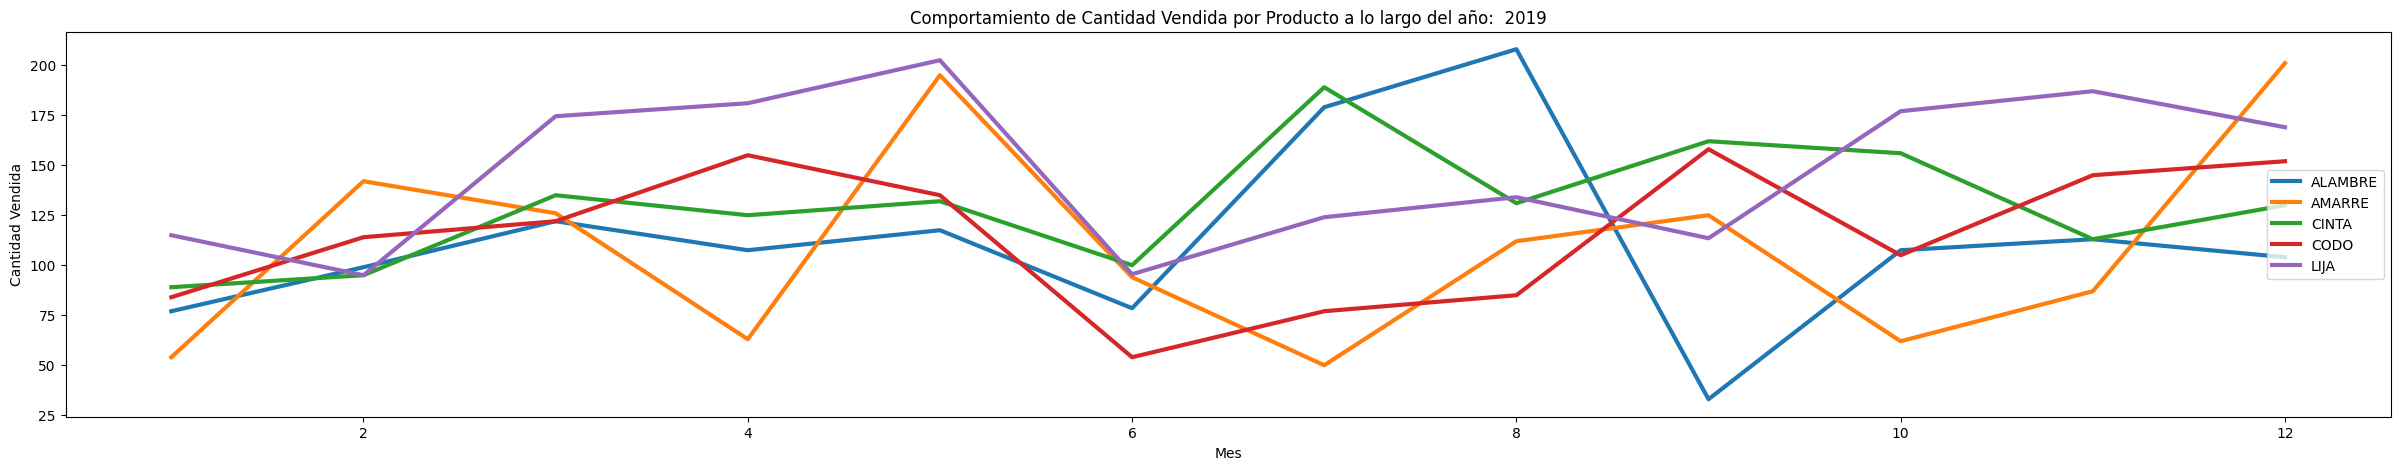

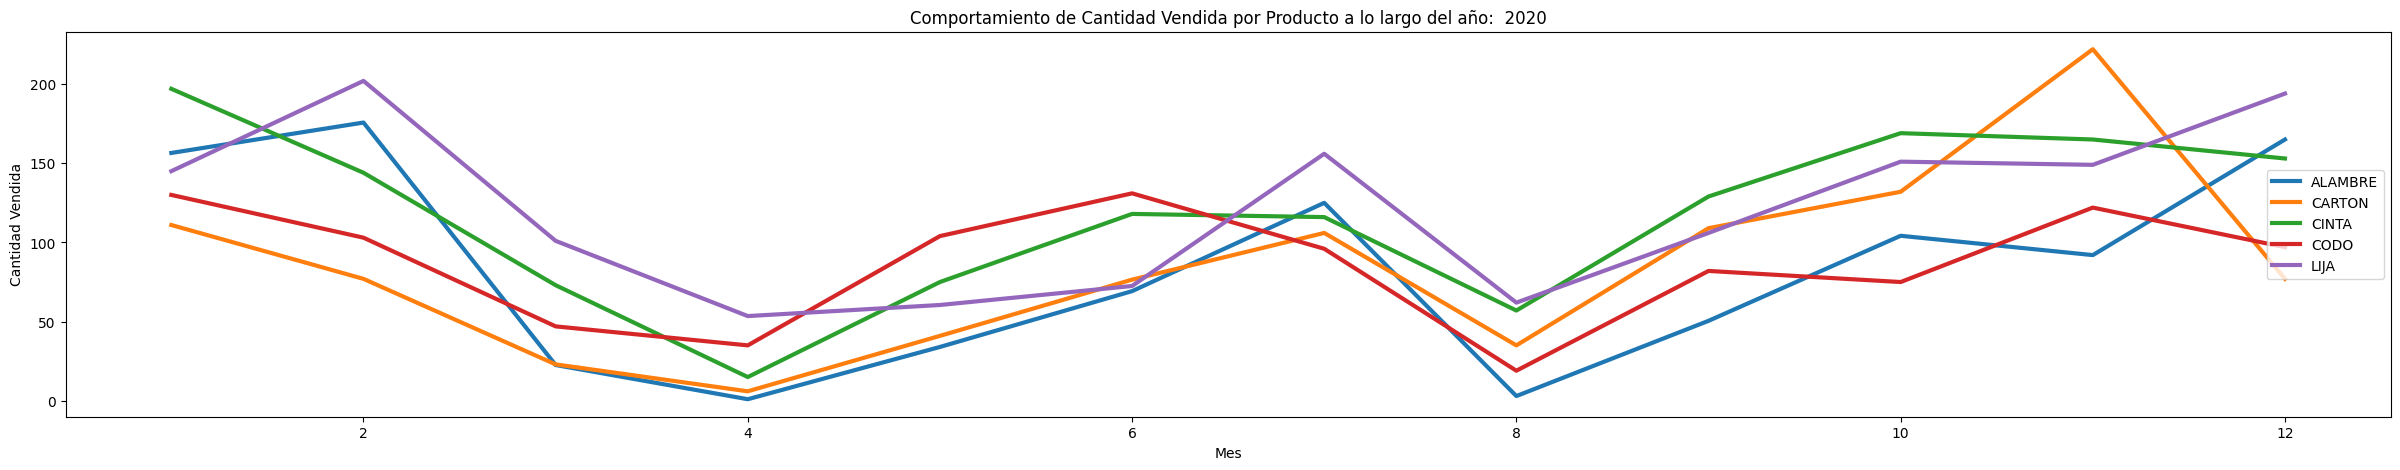

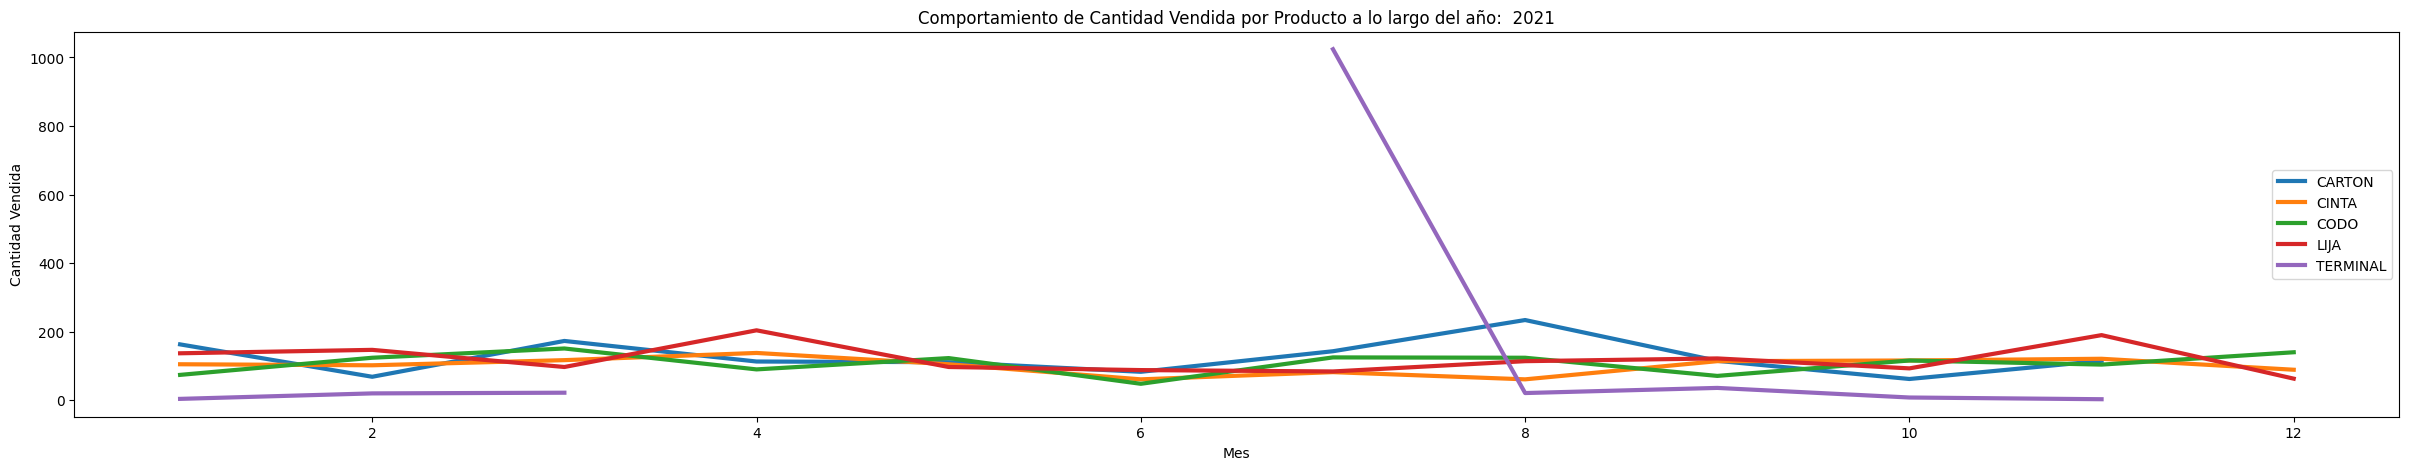

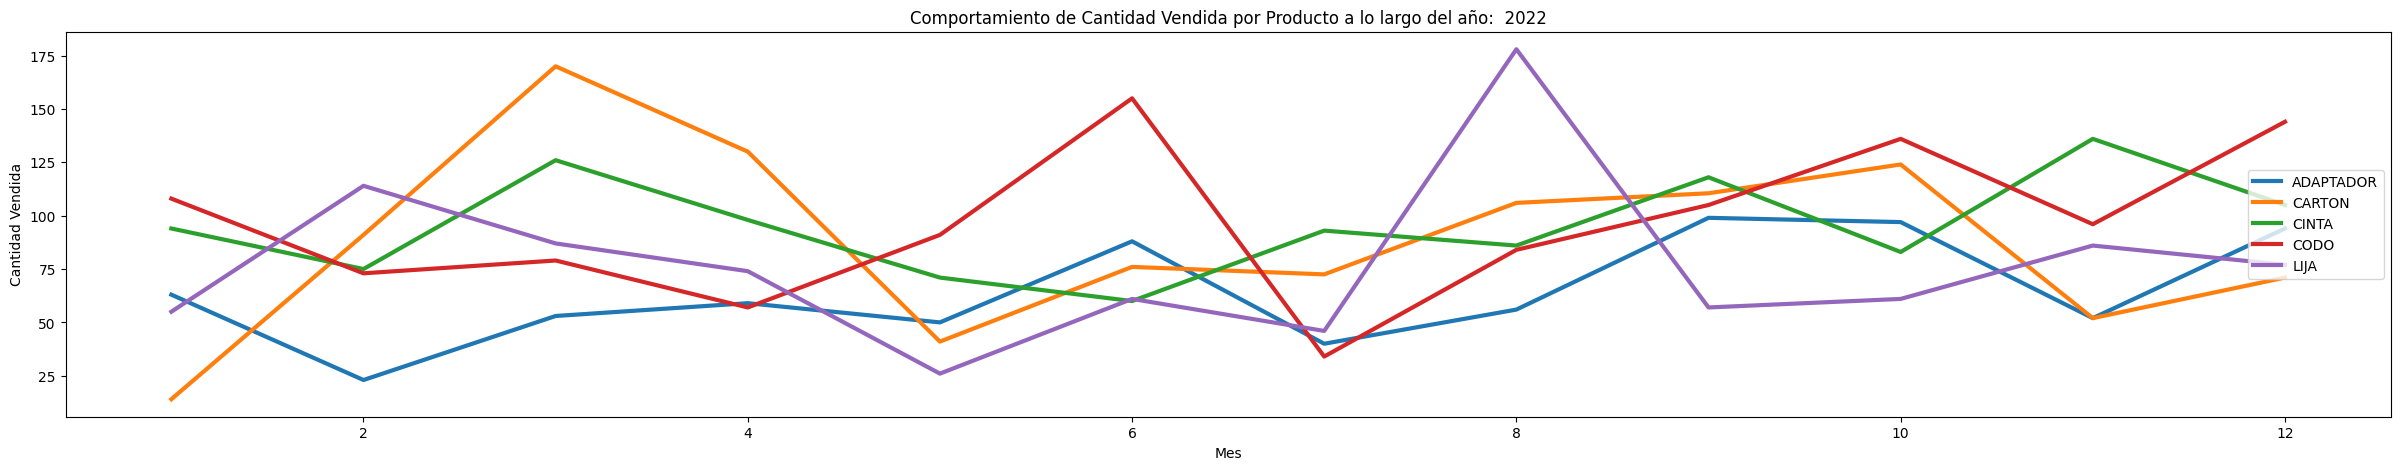

In [12]:
for i in d['year'].unique():
  graph=d[d['year'] == i].groupby(['Producto'])['Cantidad'].sum().reset_index().sort_values(by='Cantidad', ascending=False)['Producto'].head(5)
  gra=d[(d['year'] == i)&(d['Producto'].isin(graph))]
  df_pivot = gra.pivot(index='Producto', columns='month', values='Cantidad')
  fig, ax = plt.subplots(figsize=(30, 5))

  for product in df_pivot.index:
      ax.plot(df_pivot.columns, df_pivot.loc[product], label=product, linewidth=3)

  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad Vendida')
  ax.set_title(f'Comportamiento de Cantidad Vendida por Producto a lo largo del año:  {i}')
  ax.legend(loc='right')
  plt.show()

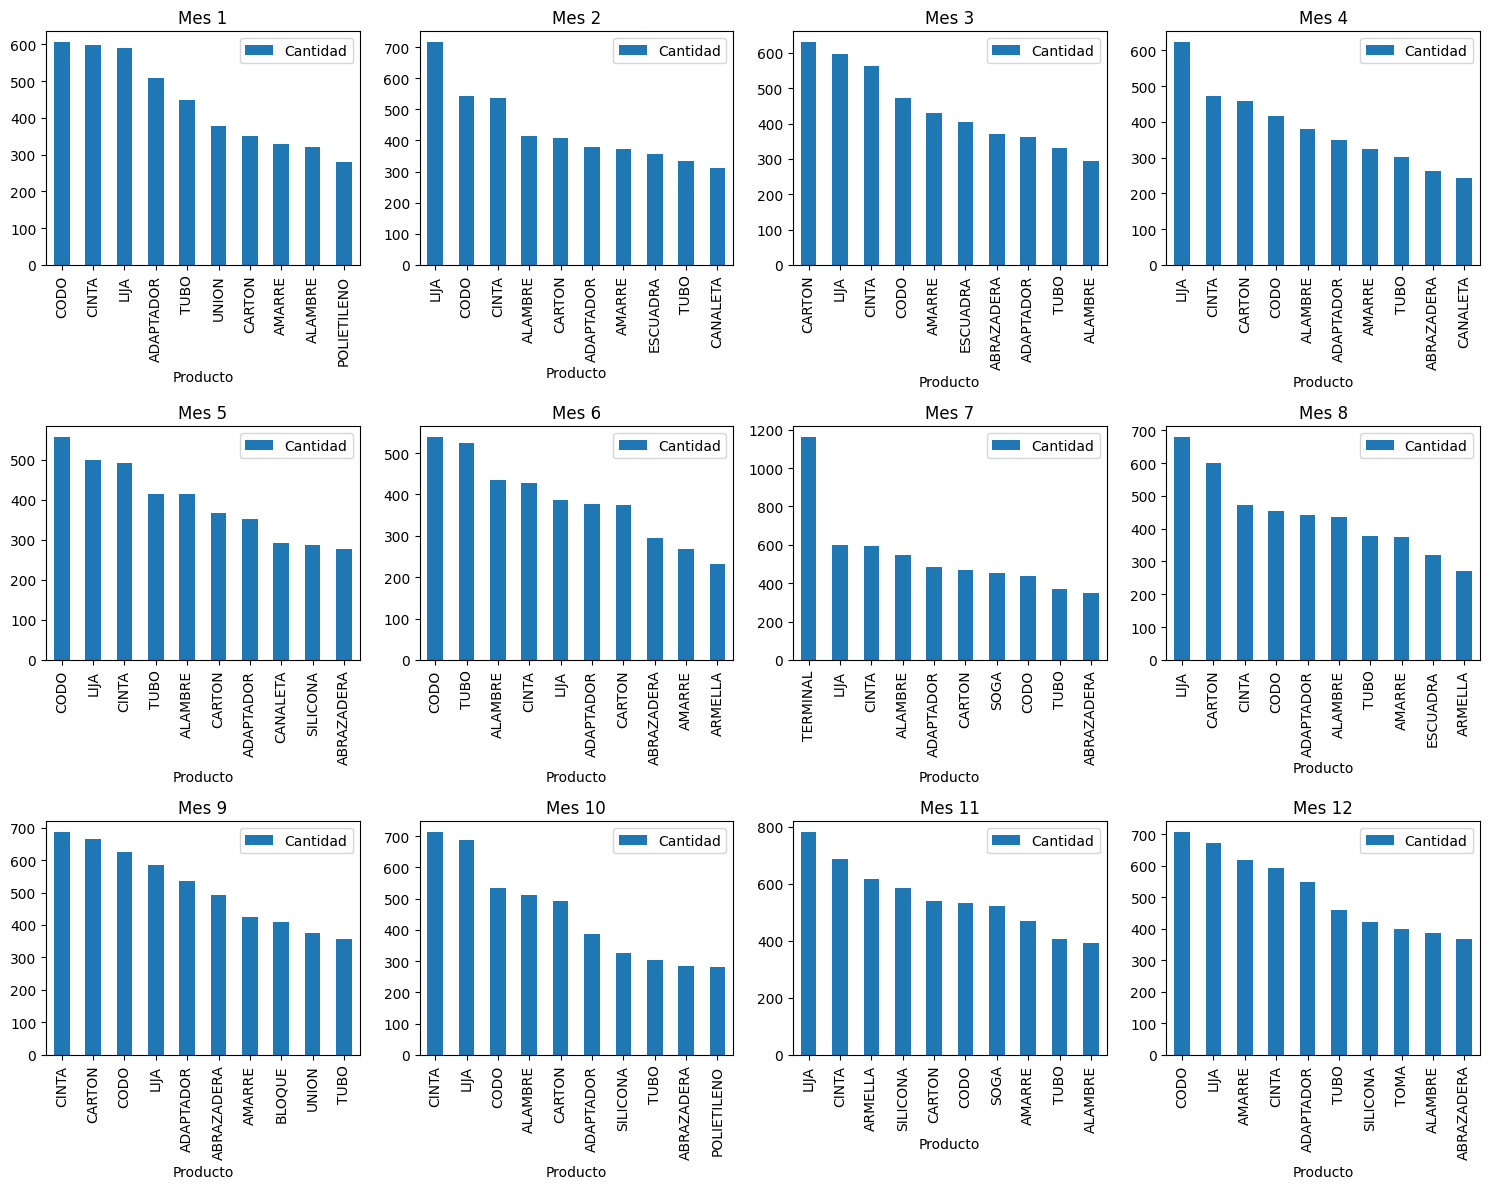

In [27]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[info['month'] == month] \
    .groupby(['month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['month','Cantidad'], ascending=[True, False])[['Producto', 'Cantidad']].head(10) 
    top.index=top['Producto']
    top5.append(top)
    top.plot(kind="bar", ax=axe[i], title=f'Mes {month}')
    i+=1

plt.tight_layout()

In [33]:
top5[0]['Producto']

Producto
CODO                  CODO
CINTA                CINTA
LIJA                  LIJA
ADAPTADOR        ADAPTADOR
TUBO                  TUBO
UNION                UNION
CARTON              CARTON
AMARRE              AMARRE
ALAMBRE            ALAMBRE
POLIETILENO    POLIETILENO
Name: Producto, dtype: object

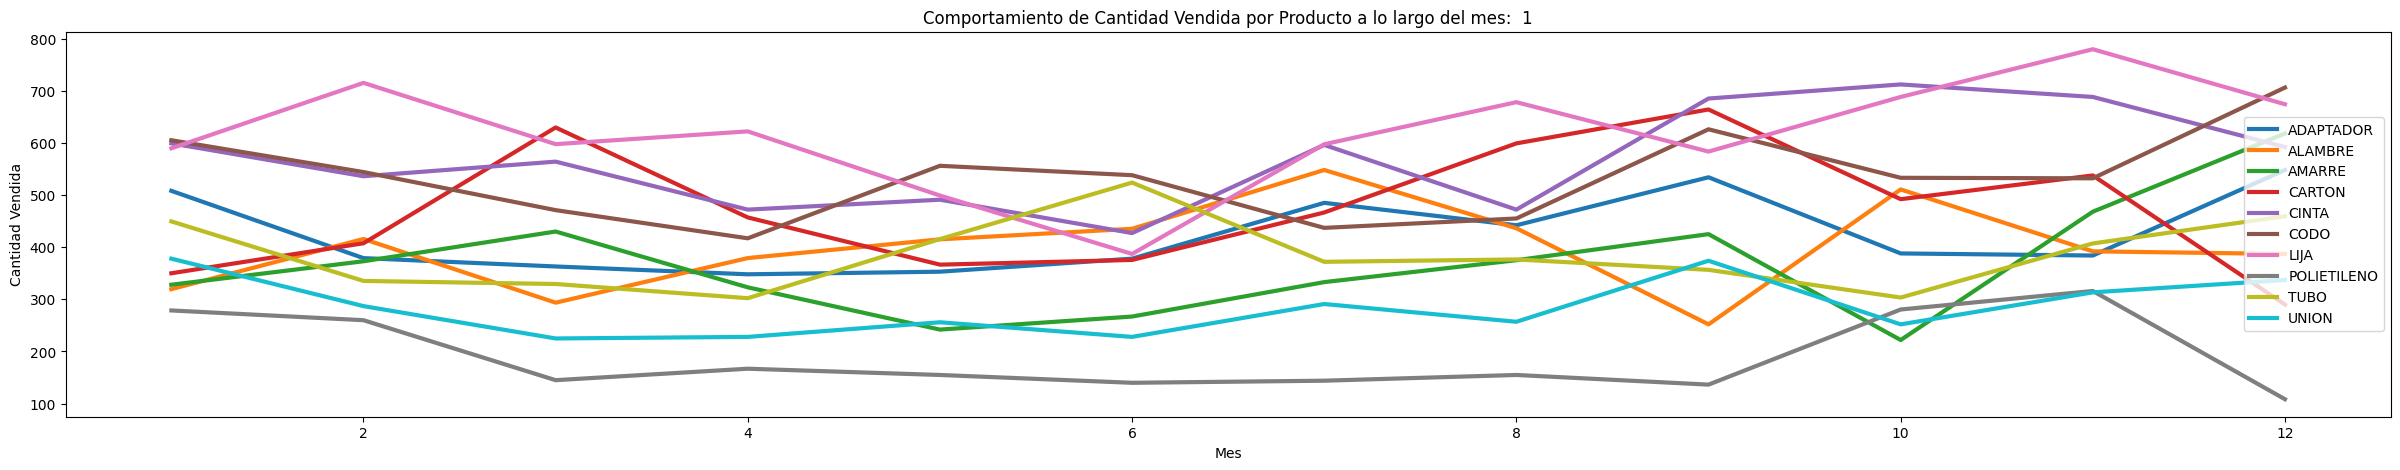

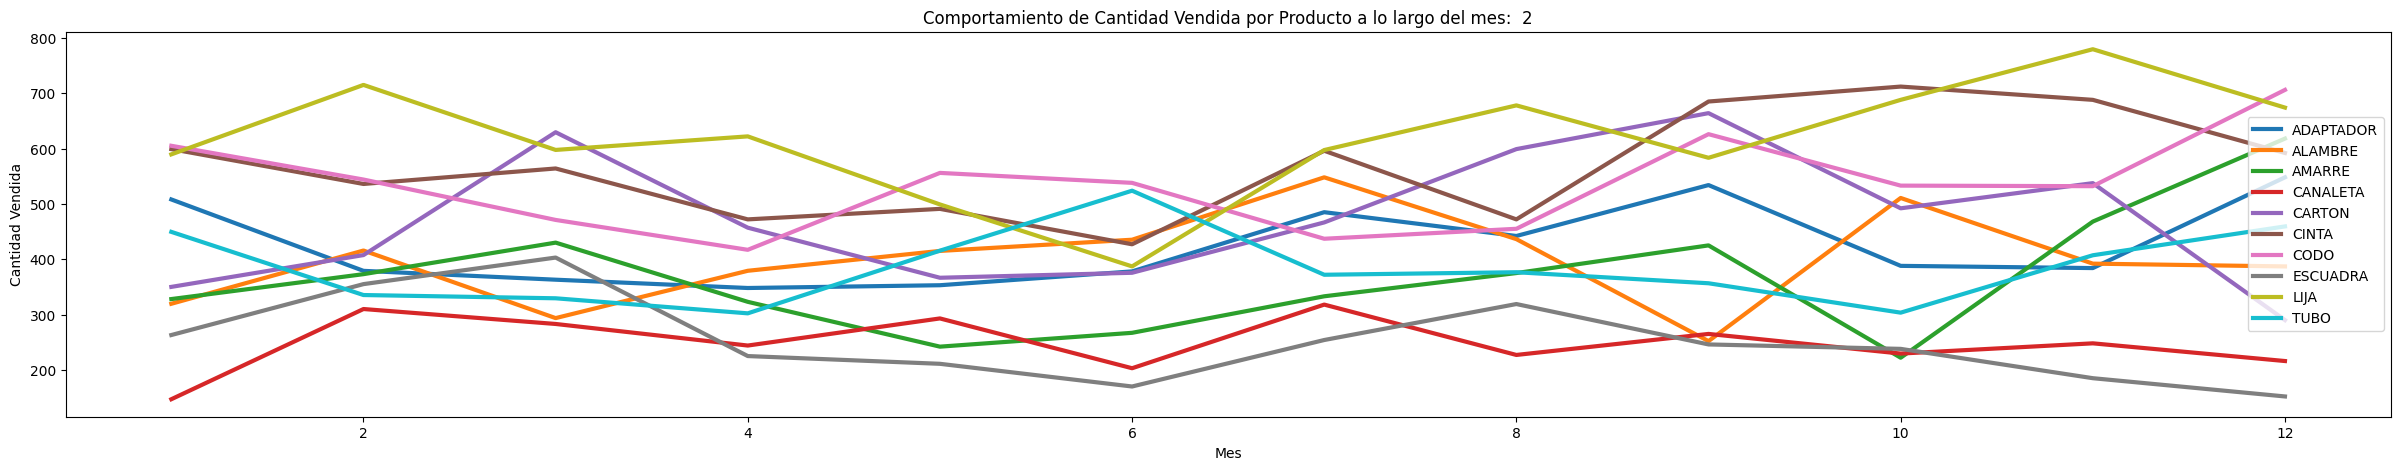

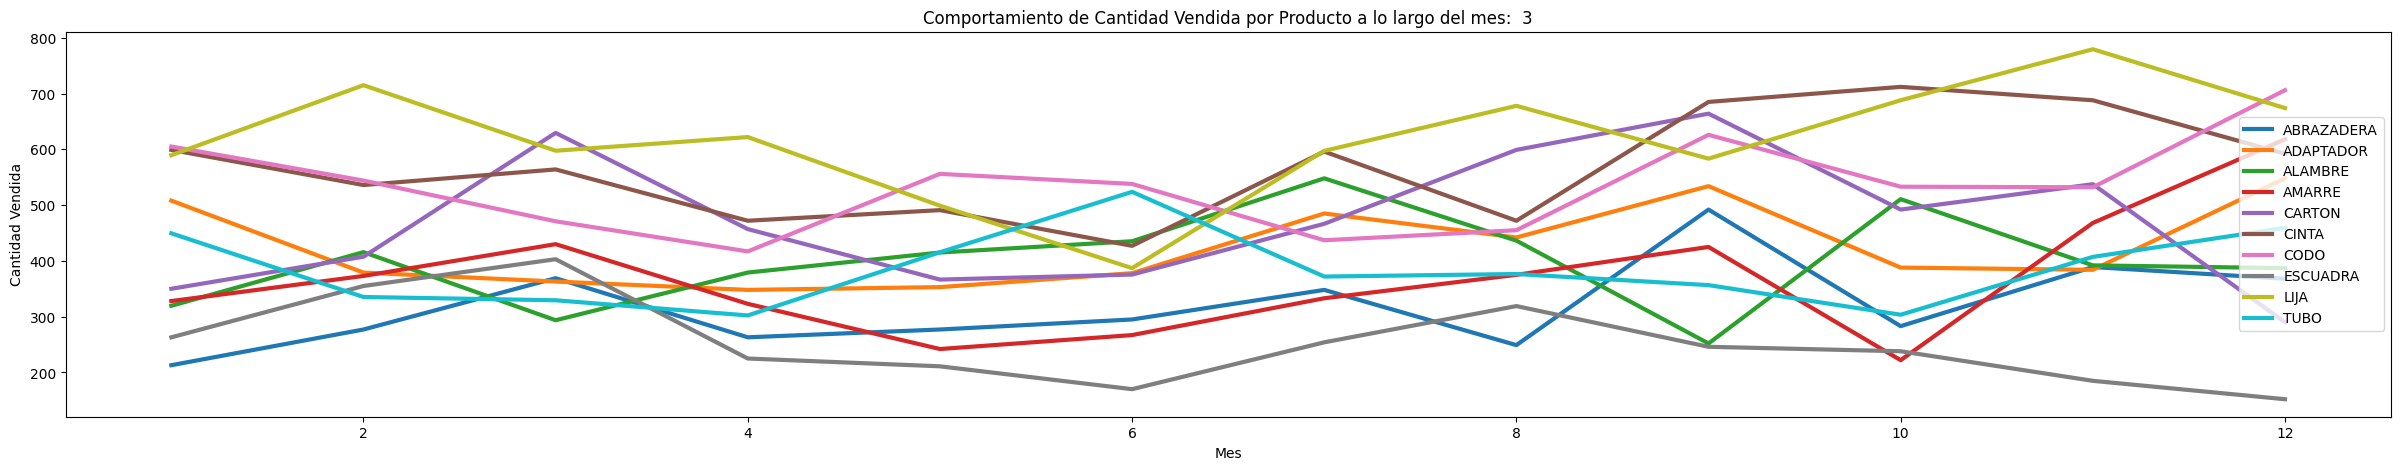

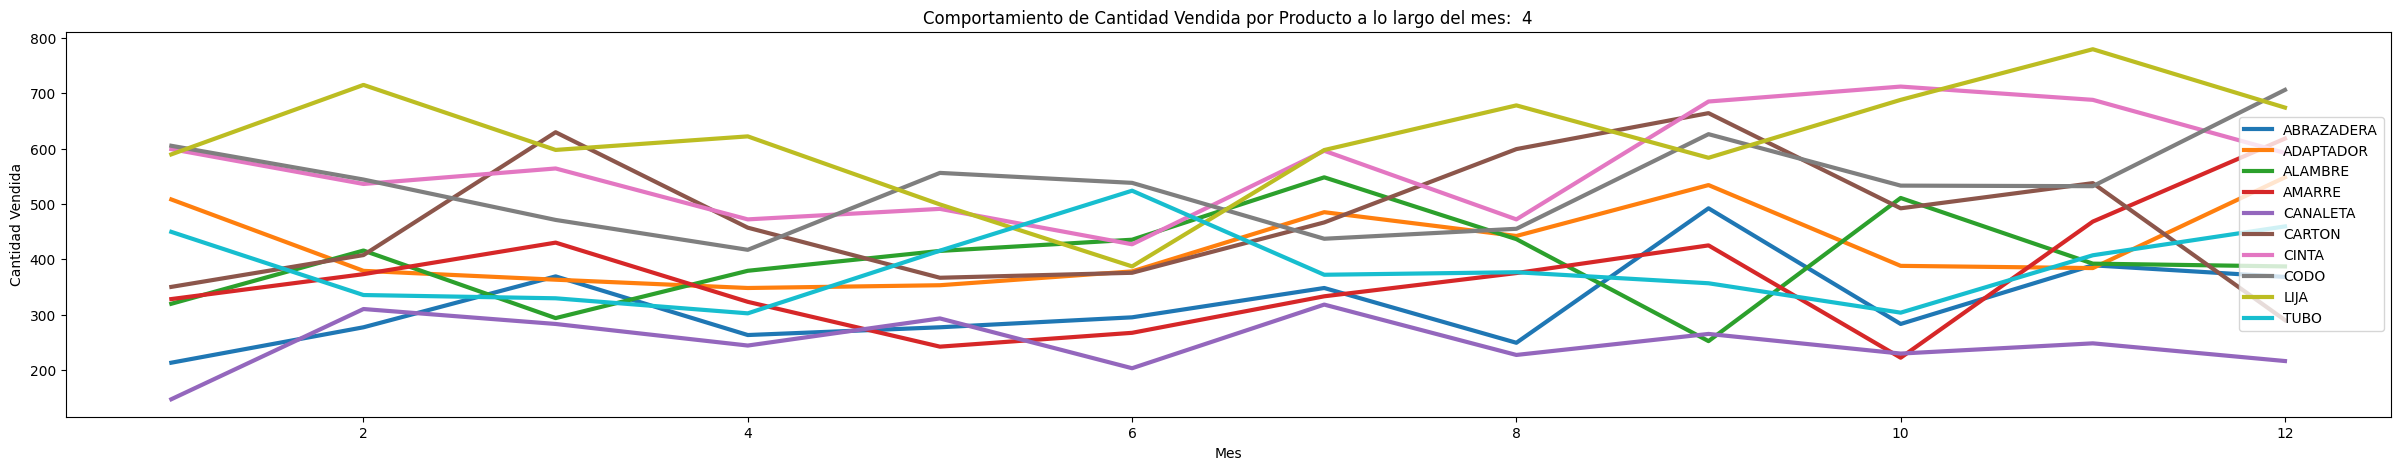

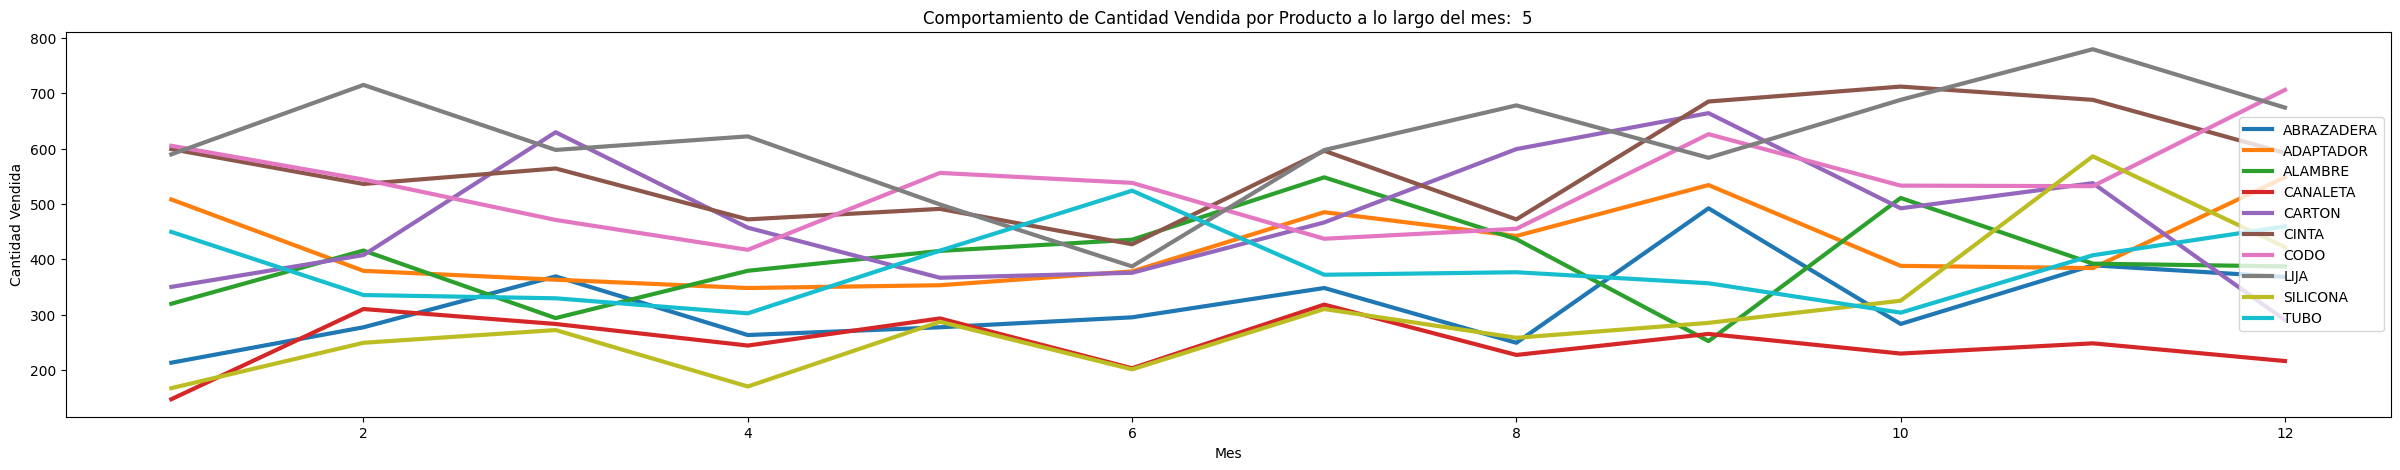

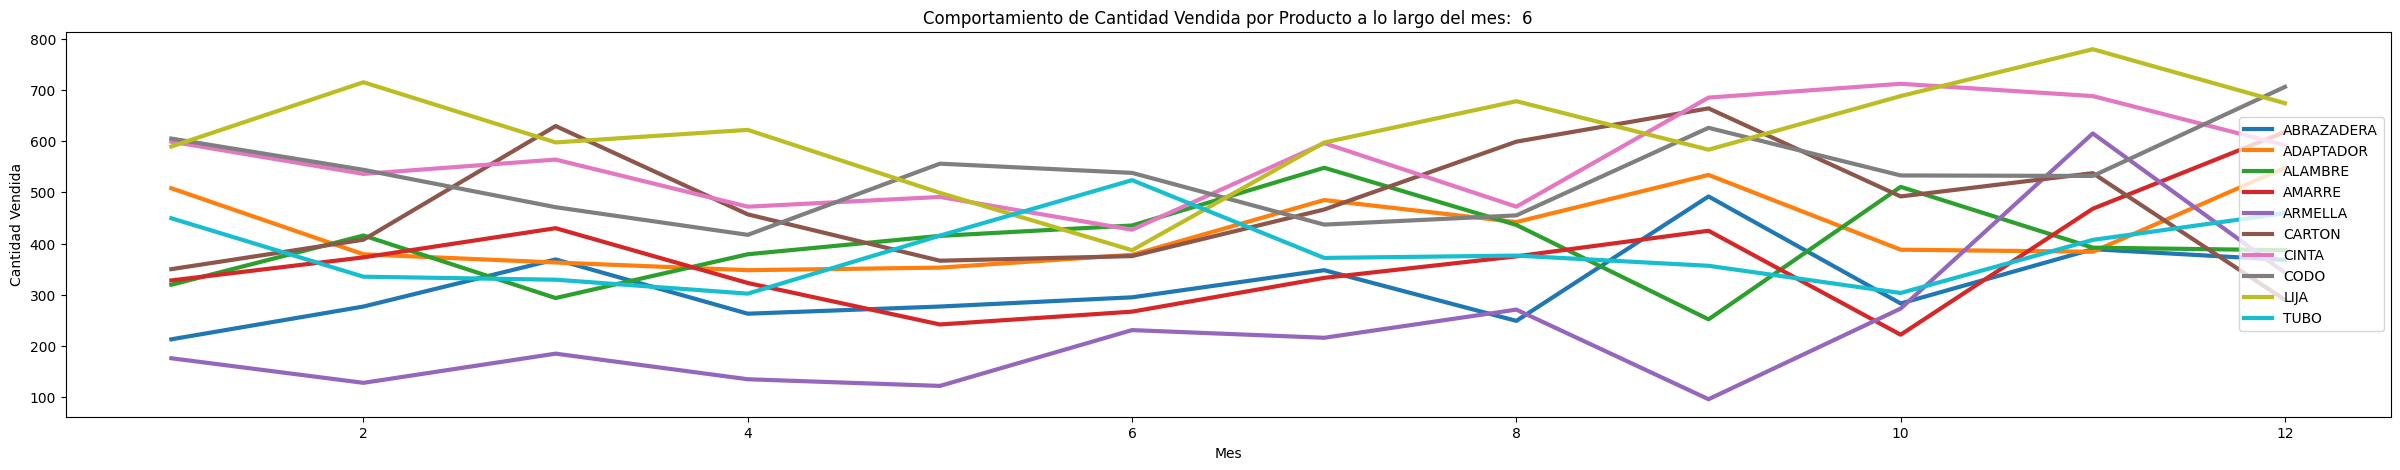

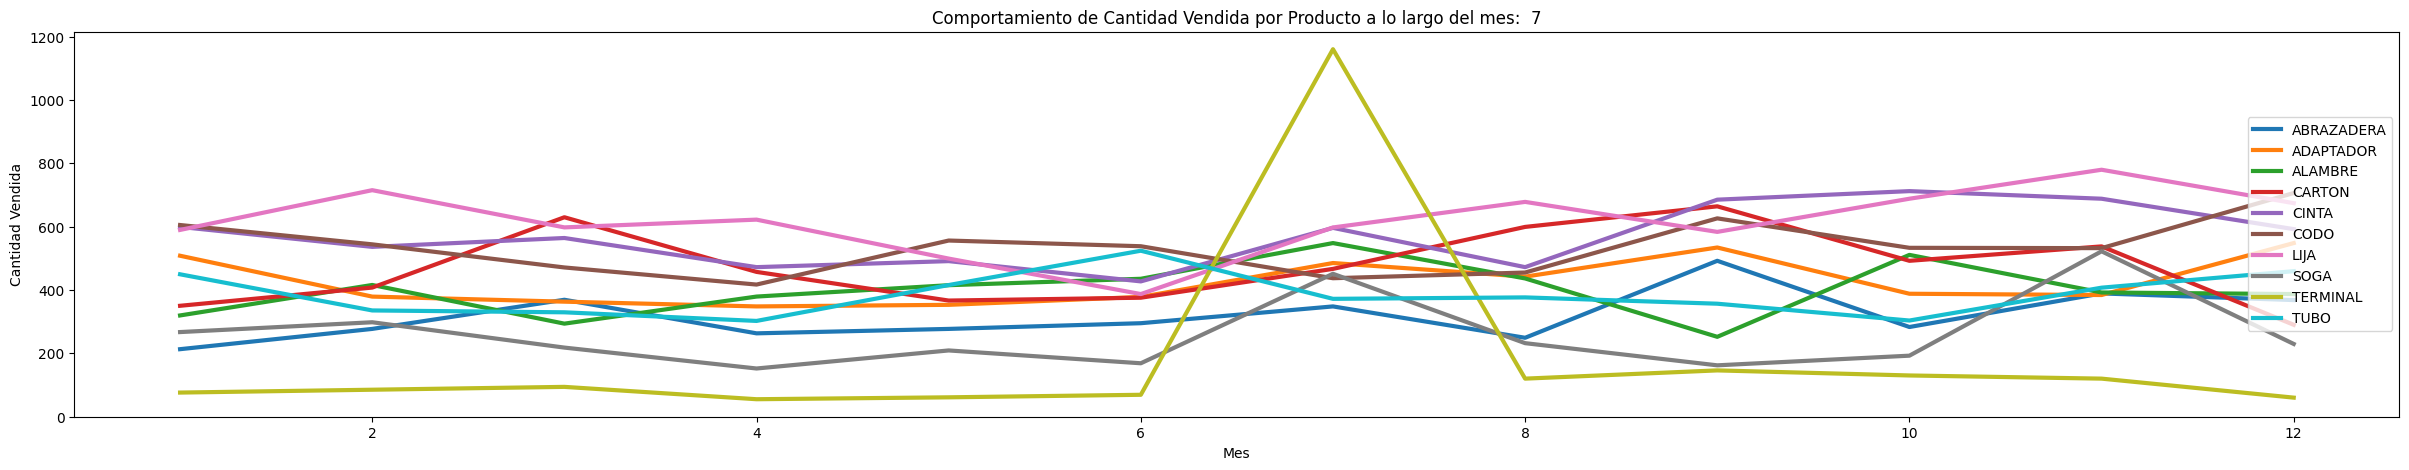

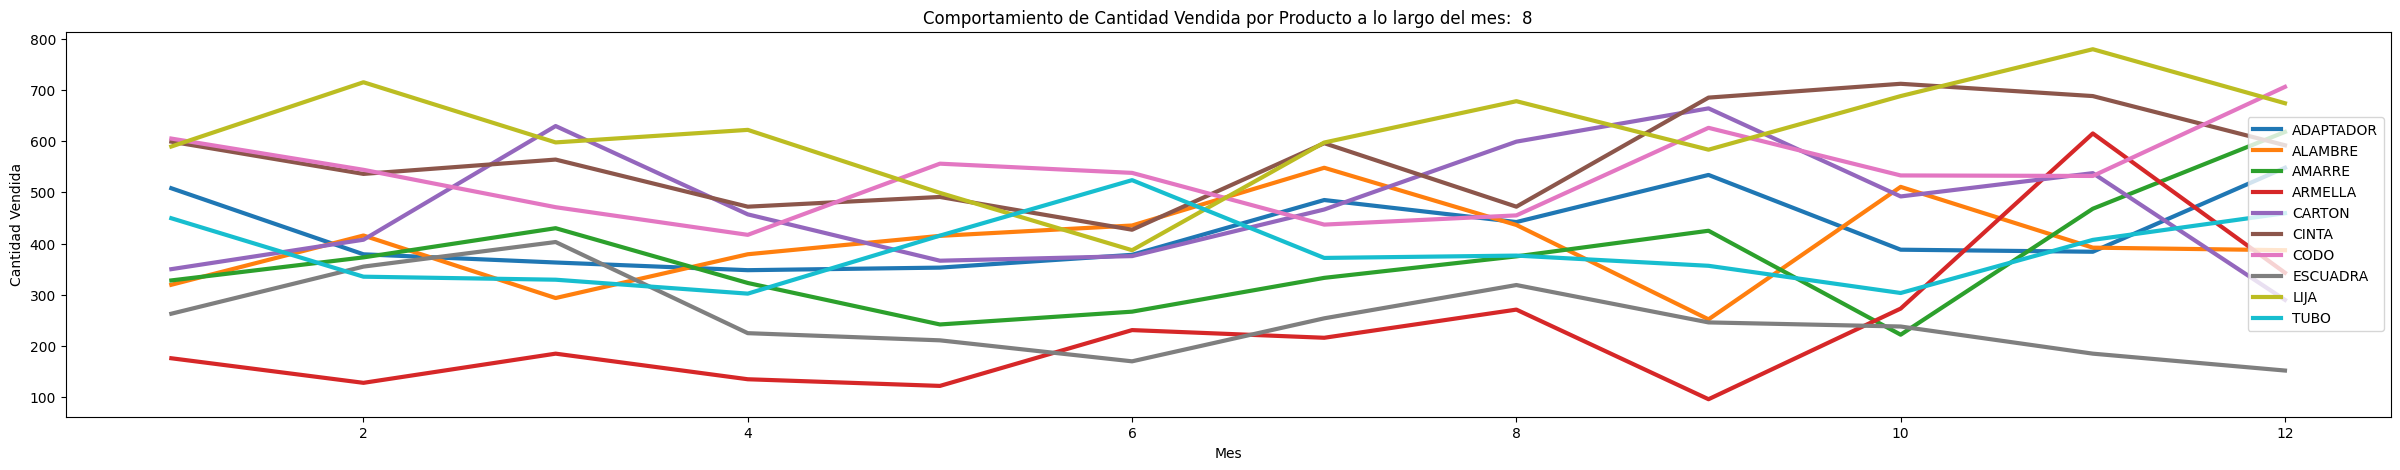

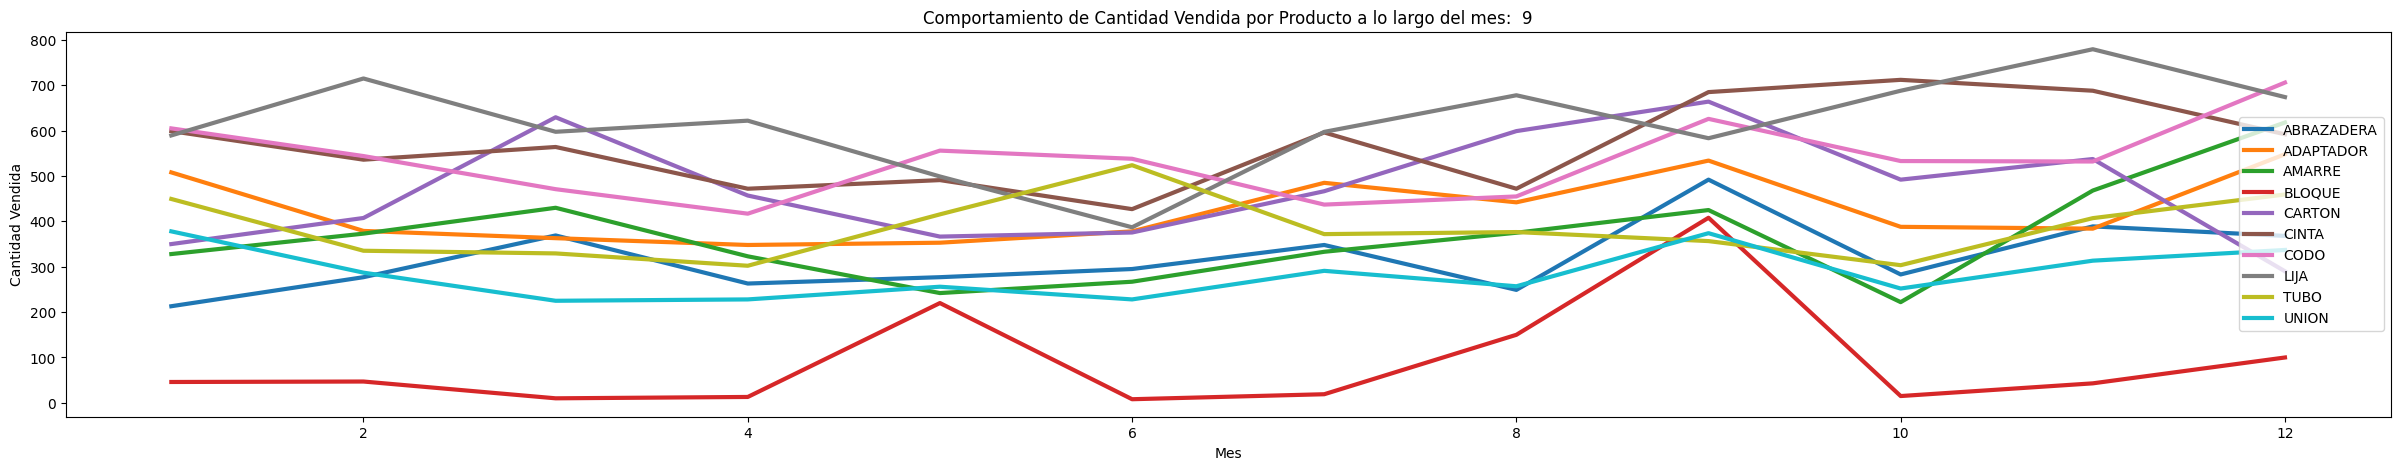

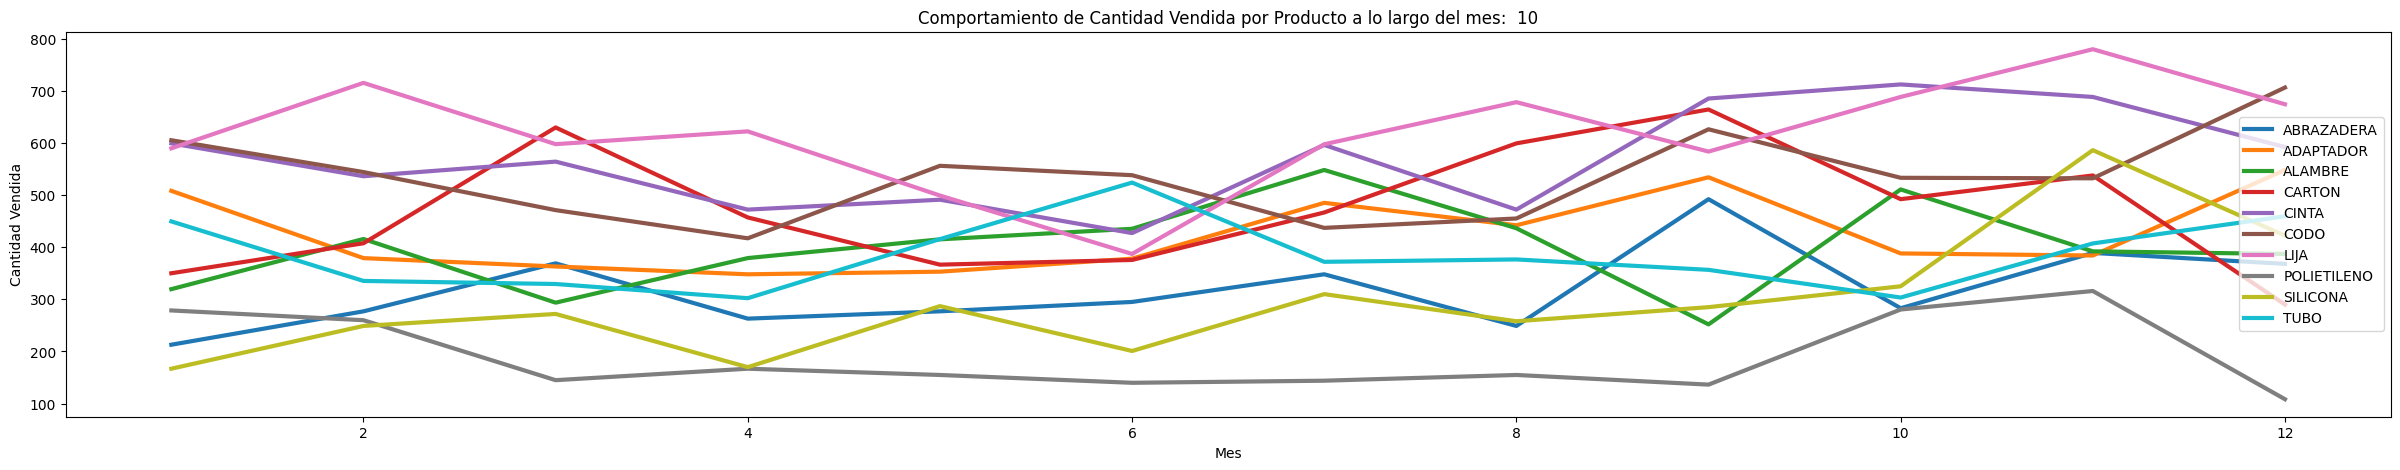

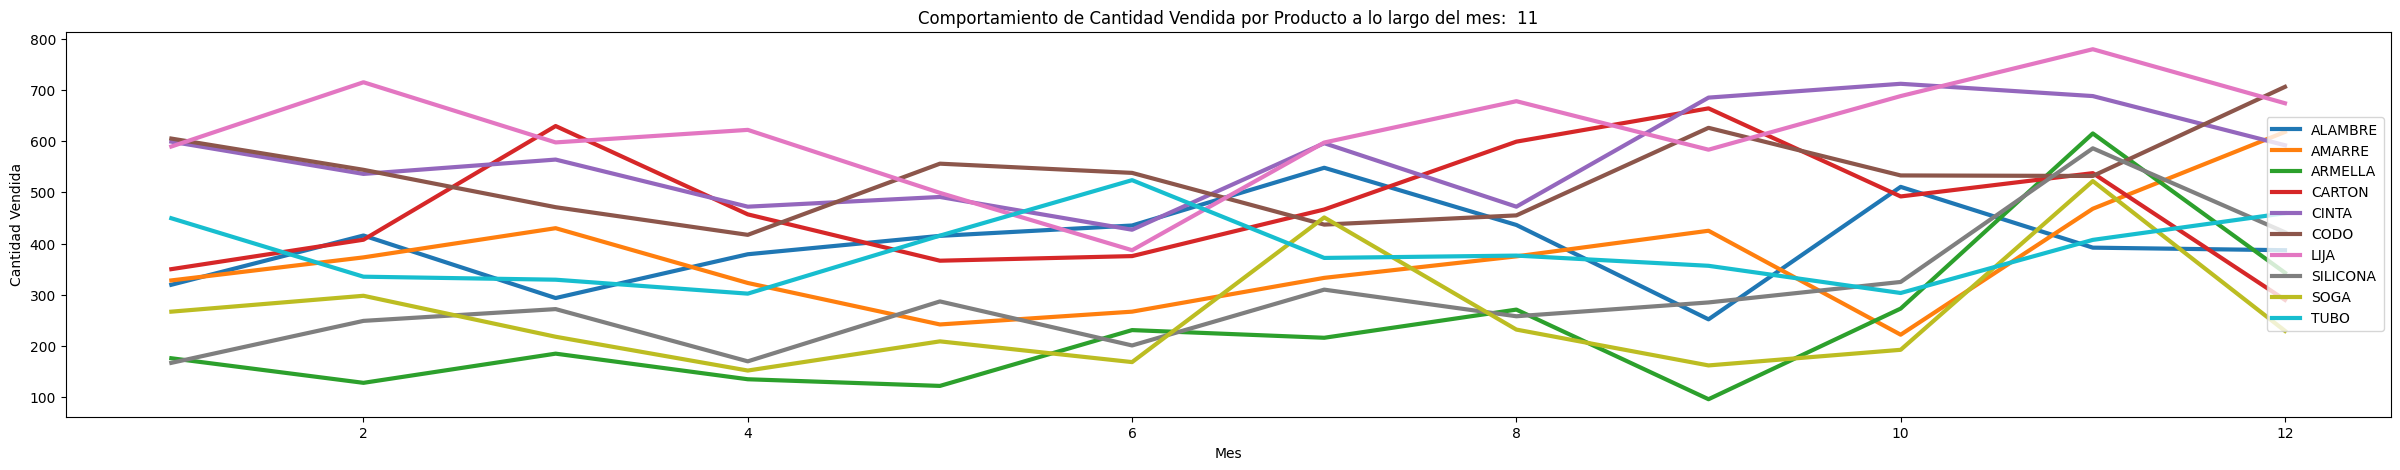

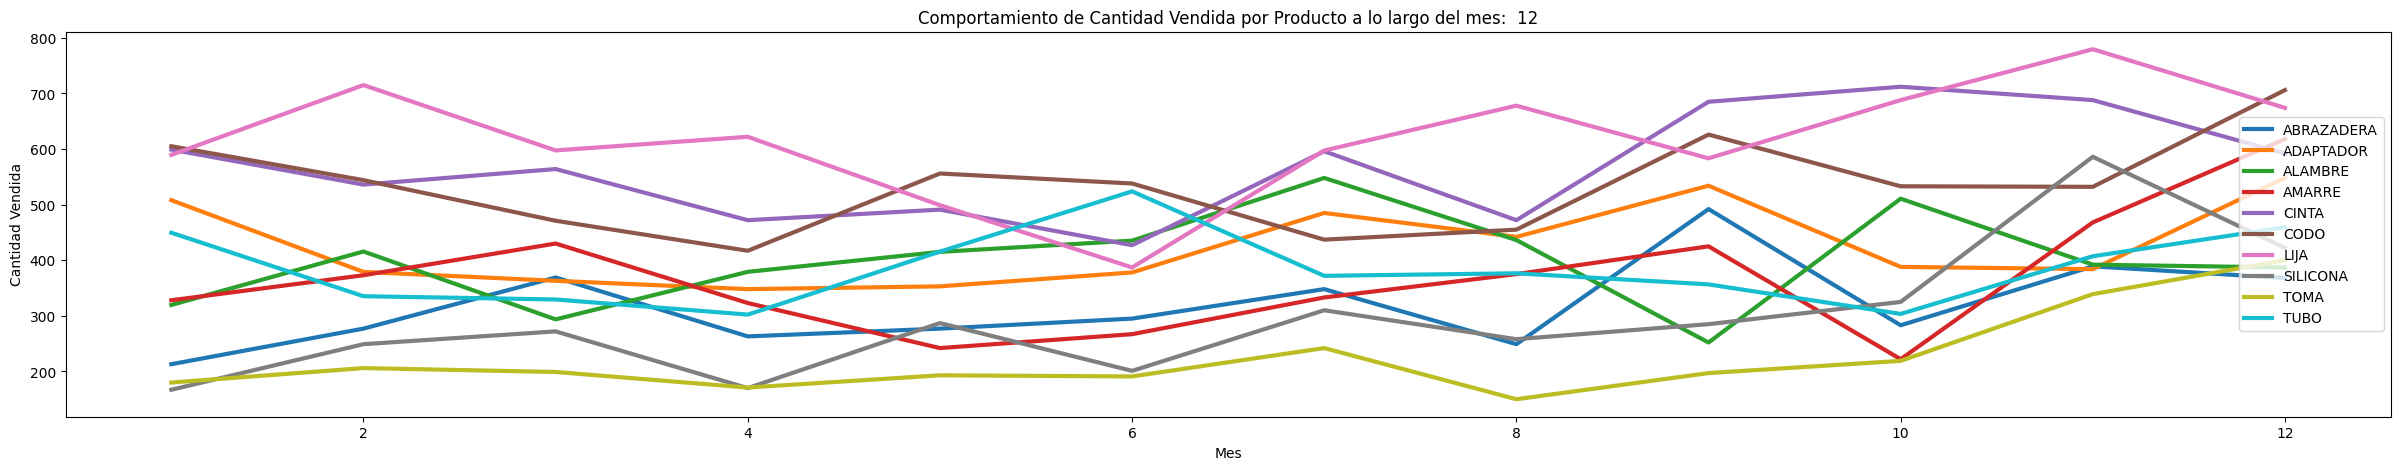

In [45]:
graph=d.groupby(['Producto', 'month'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad', 'month'], ascending=[False, True])[['Producto', 'month', 'Cantidad']]
for i in range(0,12):  
  gra=graph[(graph['Producto'].isin(top5[i]['Producto']))]
  df_pivot = gra.pivot(index='Producto', columns='month', values='Cantidad')
  fig, ax = plt.subplots(figsize=(30, 5))

  for product in df_pivot.index:
      ax.plot(df_pivot.columns, df_pivot.loc[product], label=product, linewidth=3)

  ax.set_xlabel('Mes')
  ax.set_ylabel('Cantidad Vendida')
  ax.set_title(f'Comportamiento de Cantidad Vendida por Producto a lo largo del mes:  {i + 1}')
  ax.legend(loc='right')
  plt.show()

### TOP de productos por DIA

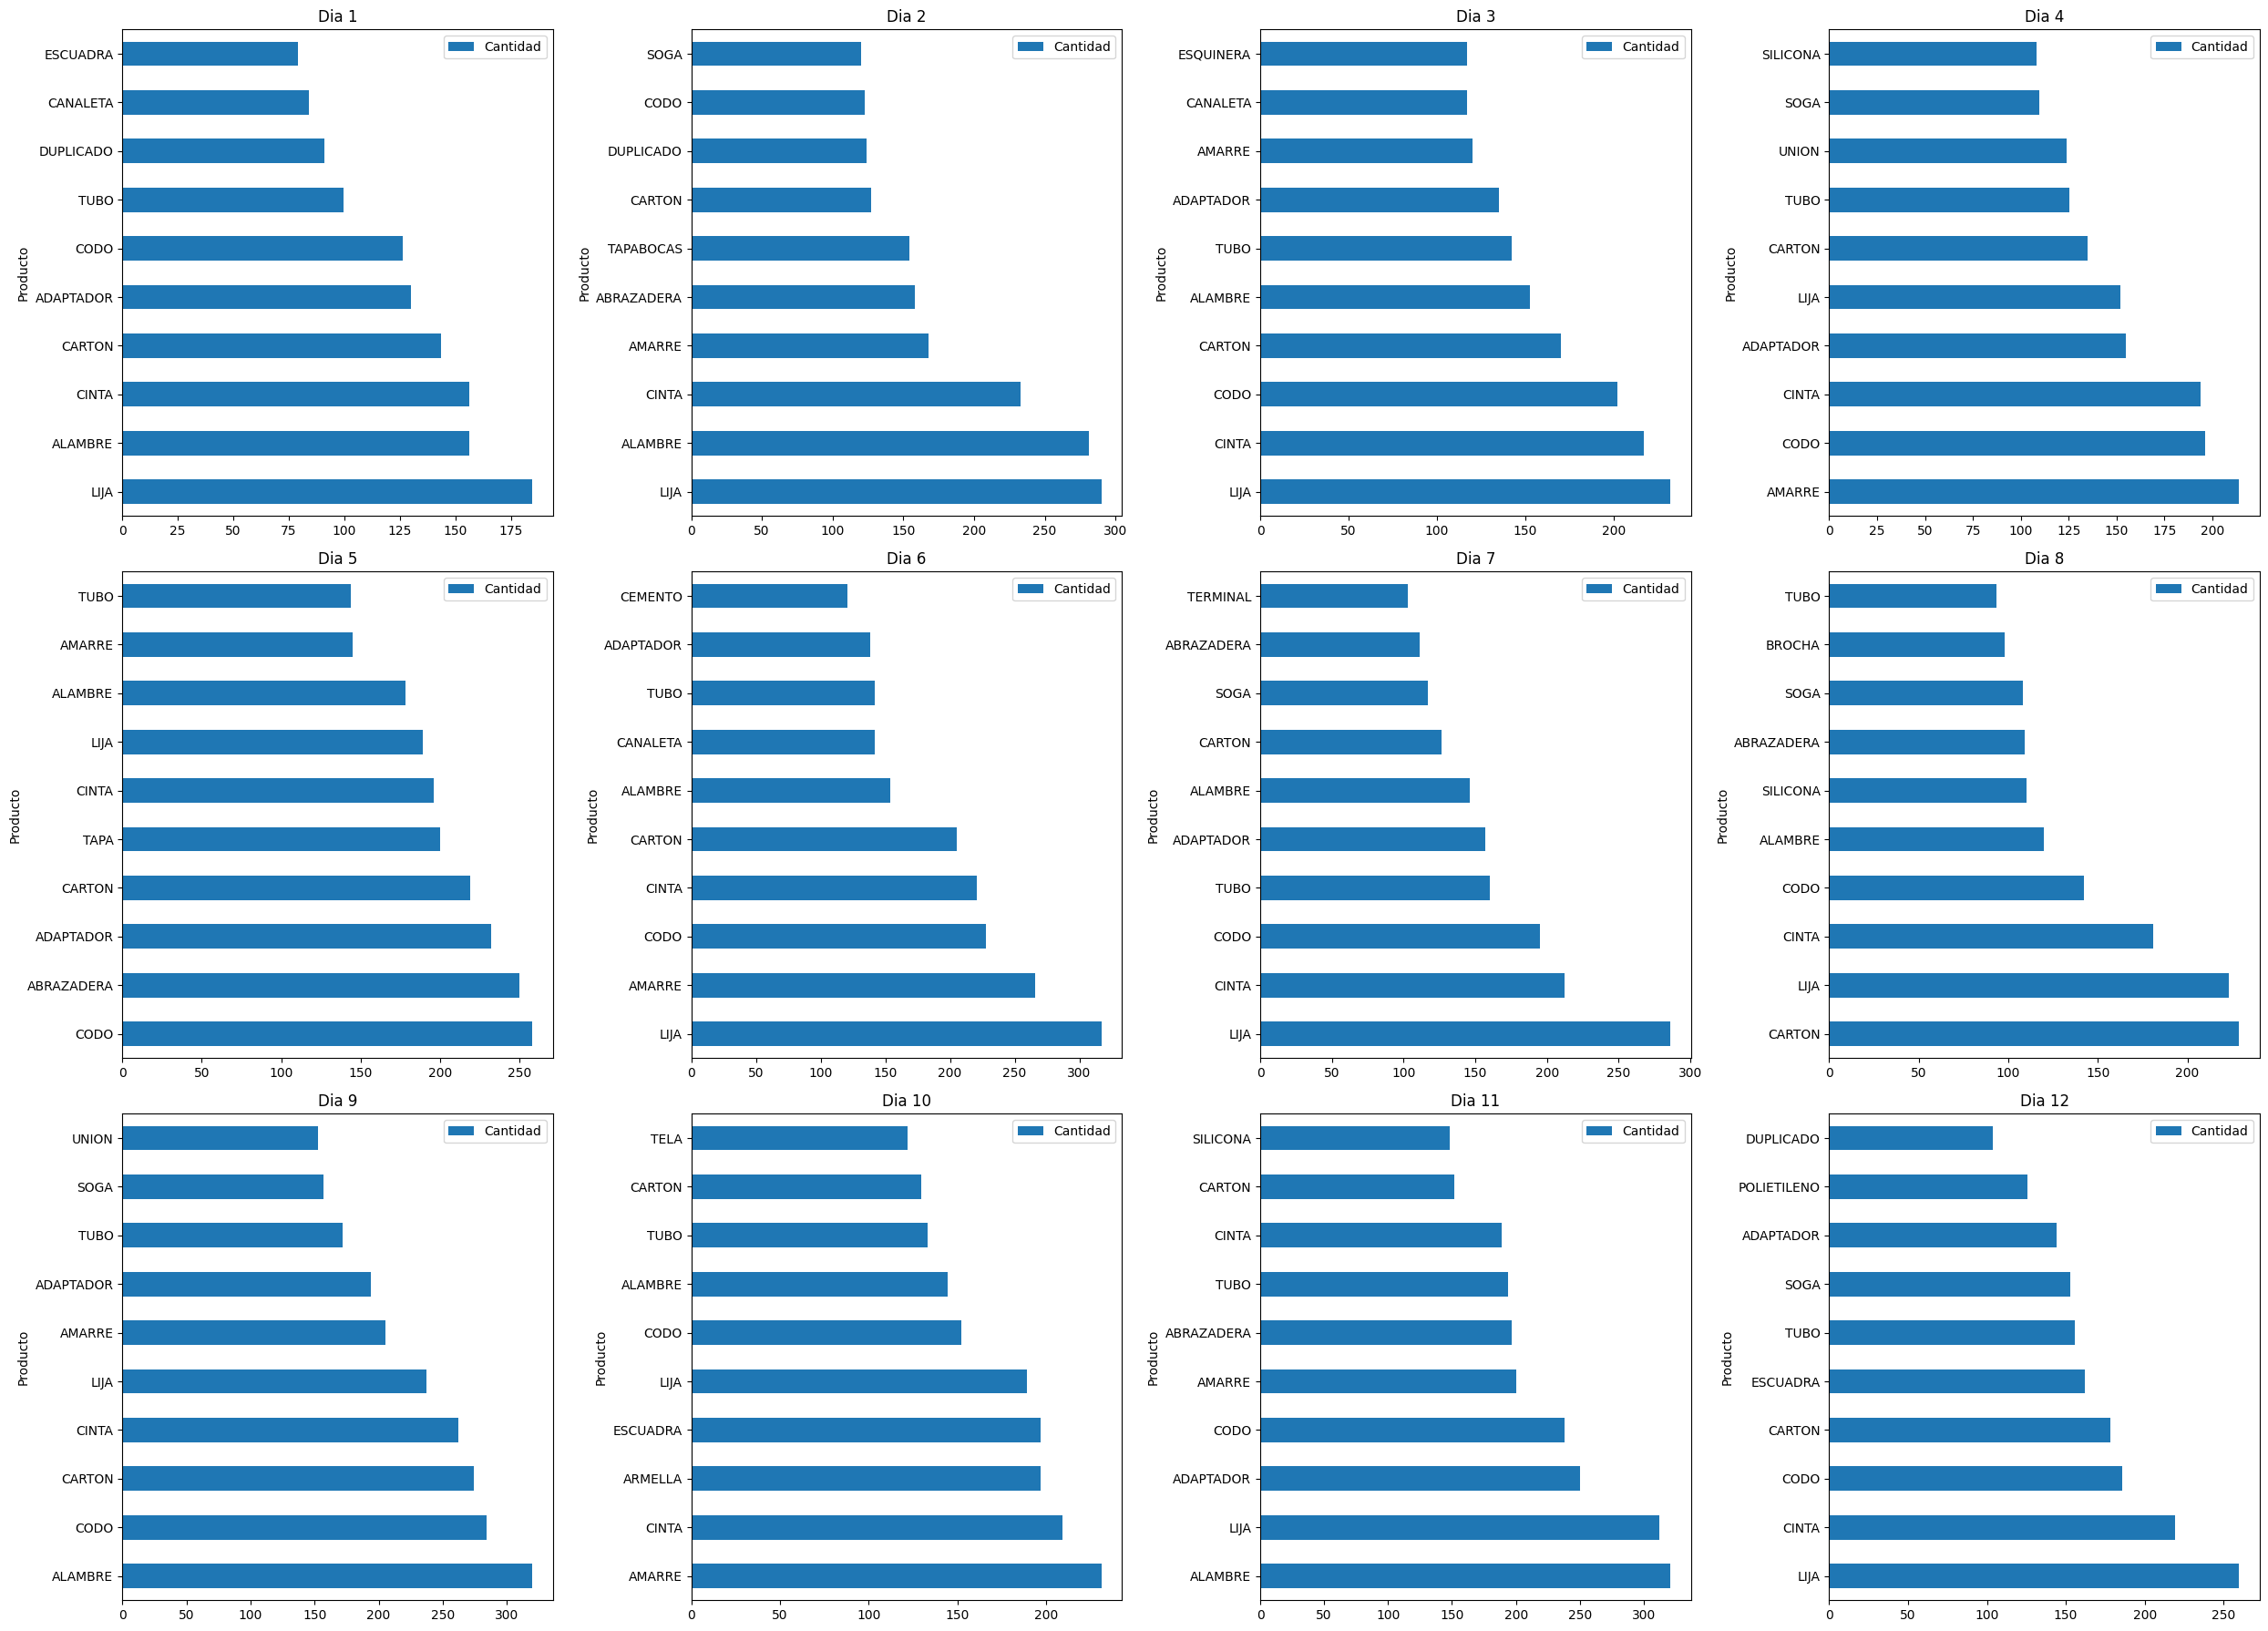

In [15]:
top5 = []
fig, axes = plt.subplots(3,4, figsize=(25, 18))
axe = axes.ravel()
i= 0
for day in range(1,13):
    top = info[info['day'] == day] \
    .groupby(['day','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['day','Cantidad'], ascending=[True, False])[['Producto', 'Cantidad']].head(10) 
    top.index=top['Producto']
    top.plot(kind="barh", ax=axe[i], title=f'Dia {day}')
    i+=1

plt.tight_layout()

#### Veremos a continuacion 5 diferentes grupos de graficas de los diferentes años, viendo si hay una tendencia por mes de cada año

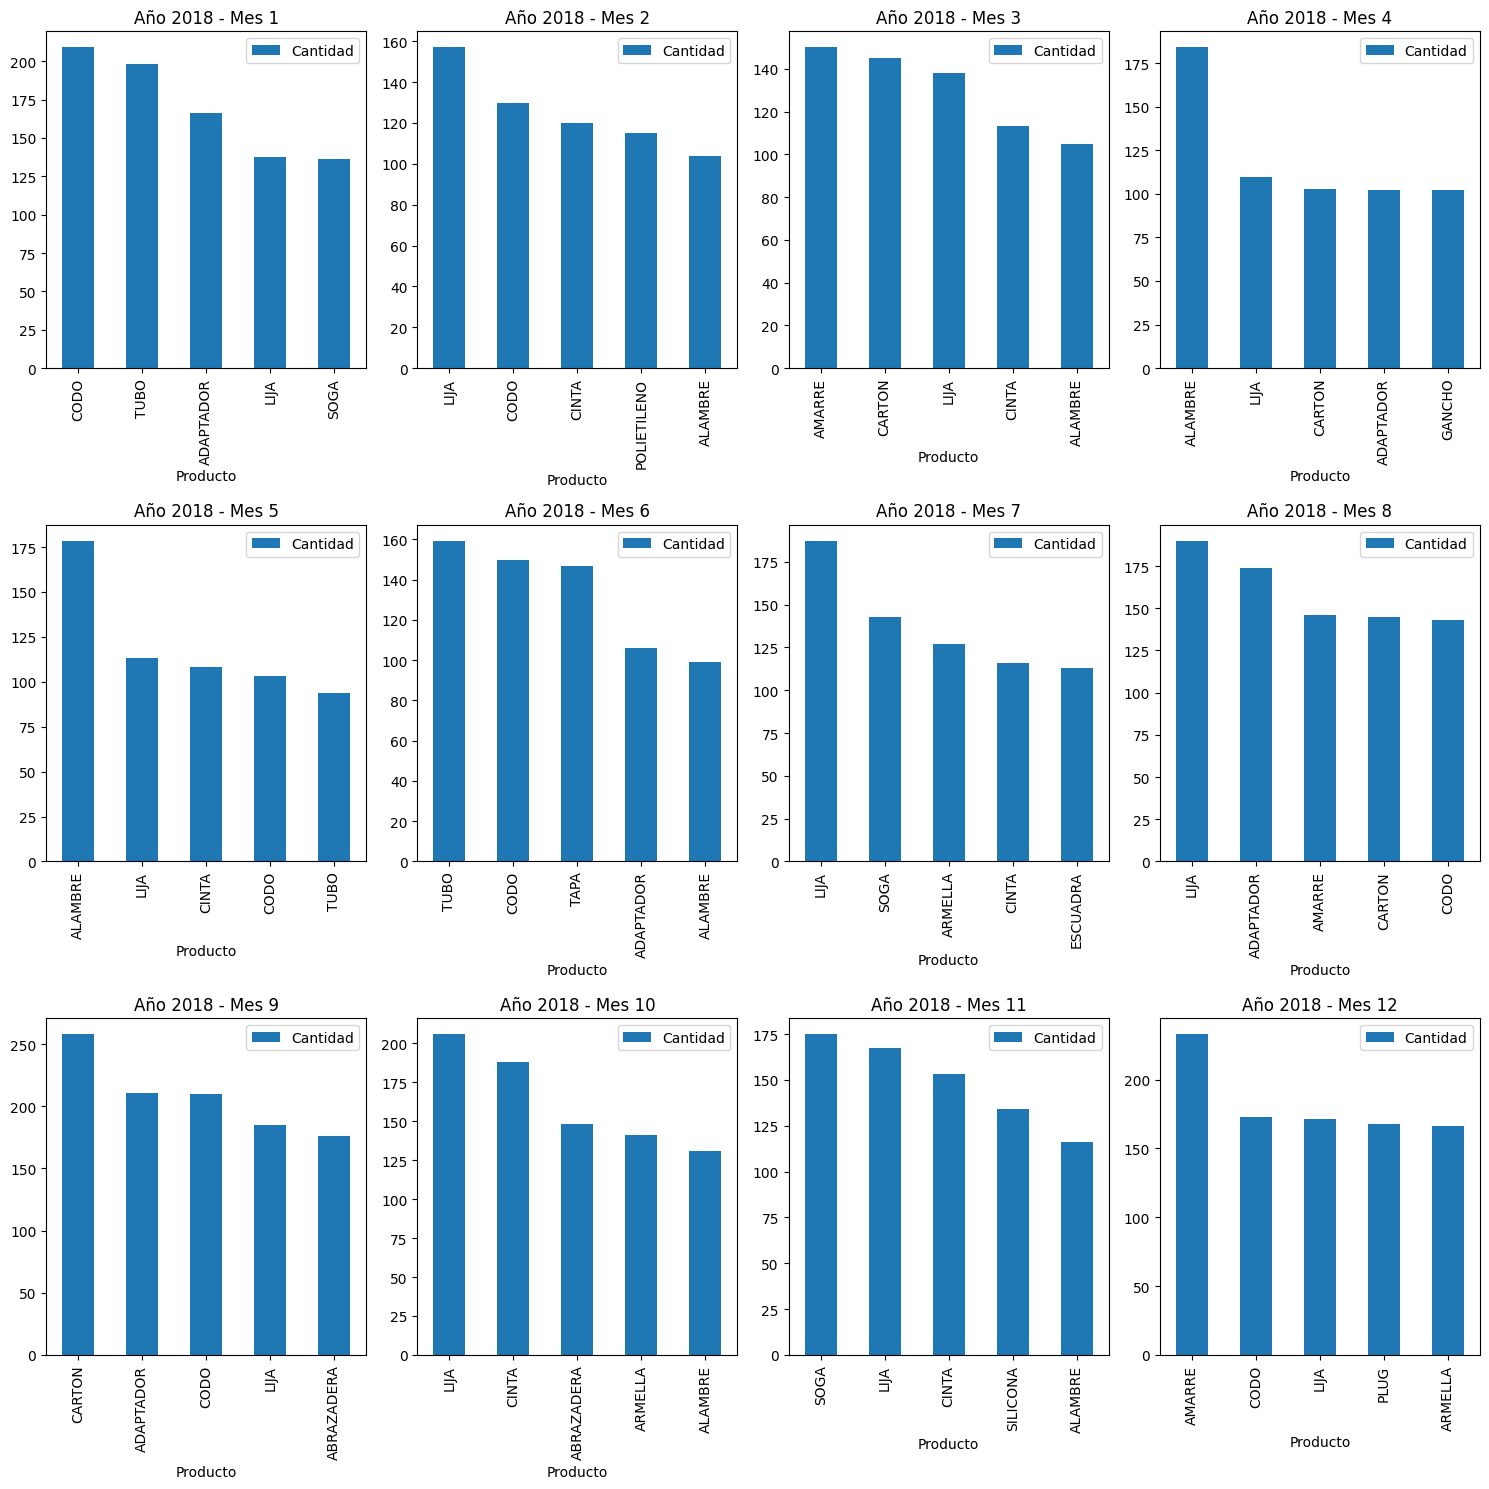

In [16]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[(info['month'] == month) & (info['year'] == 2018)] \
    .groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True, True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Año 2018 - Mes {month}')
    i+=1

plt.tight_layout()

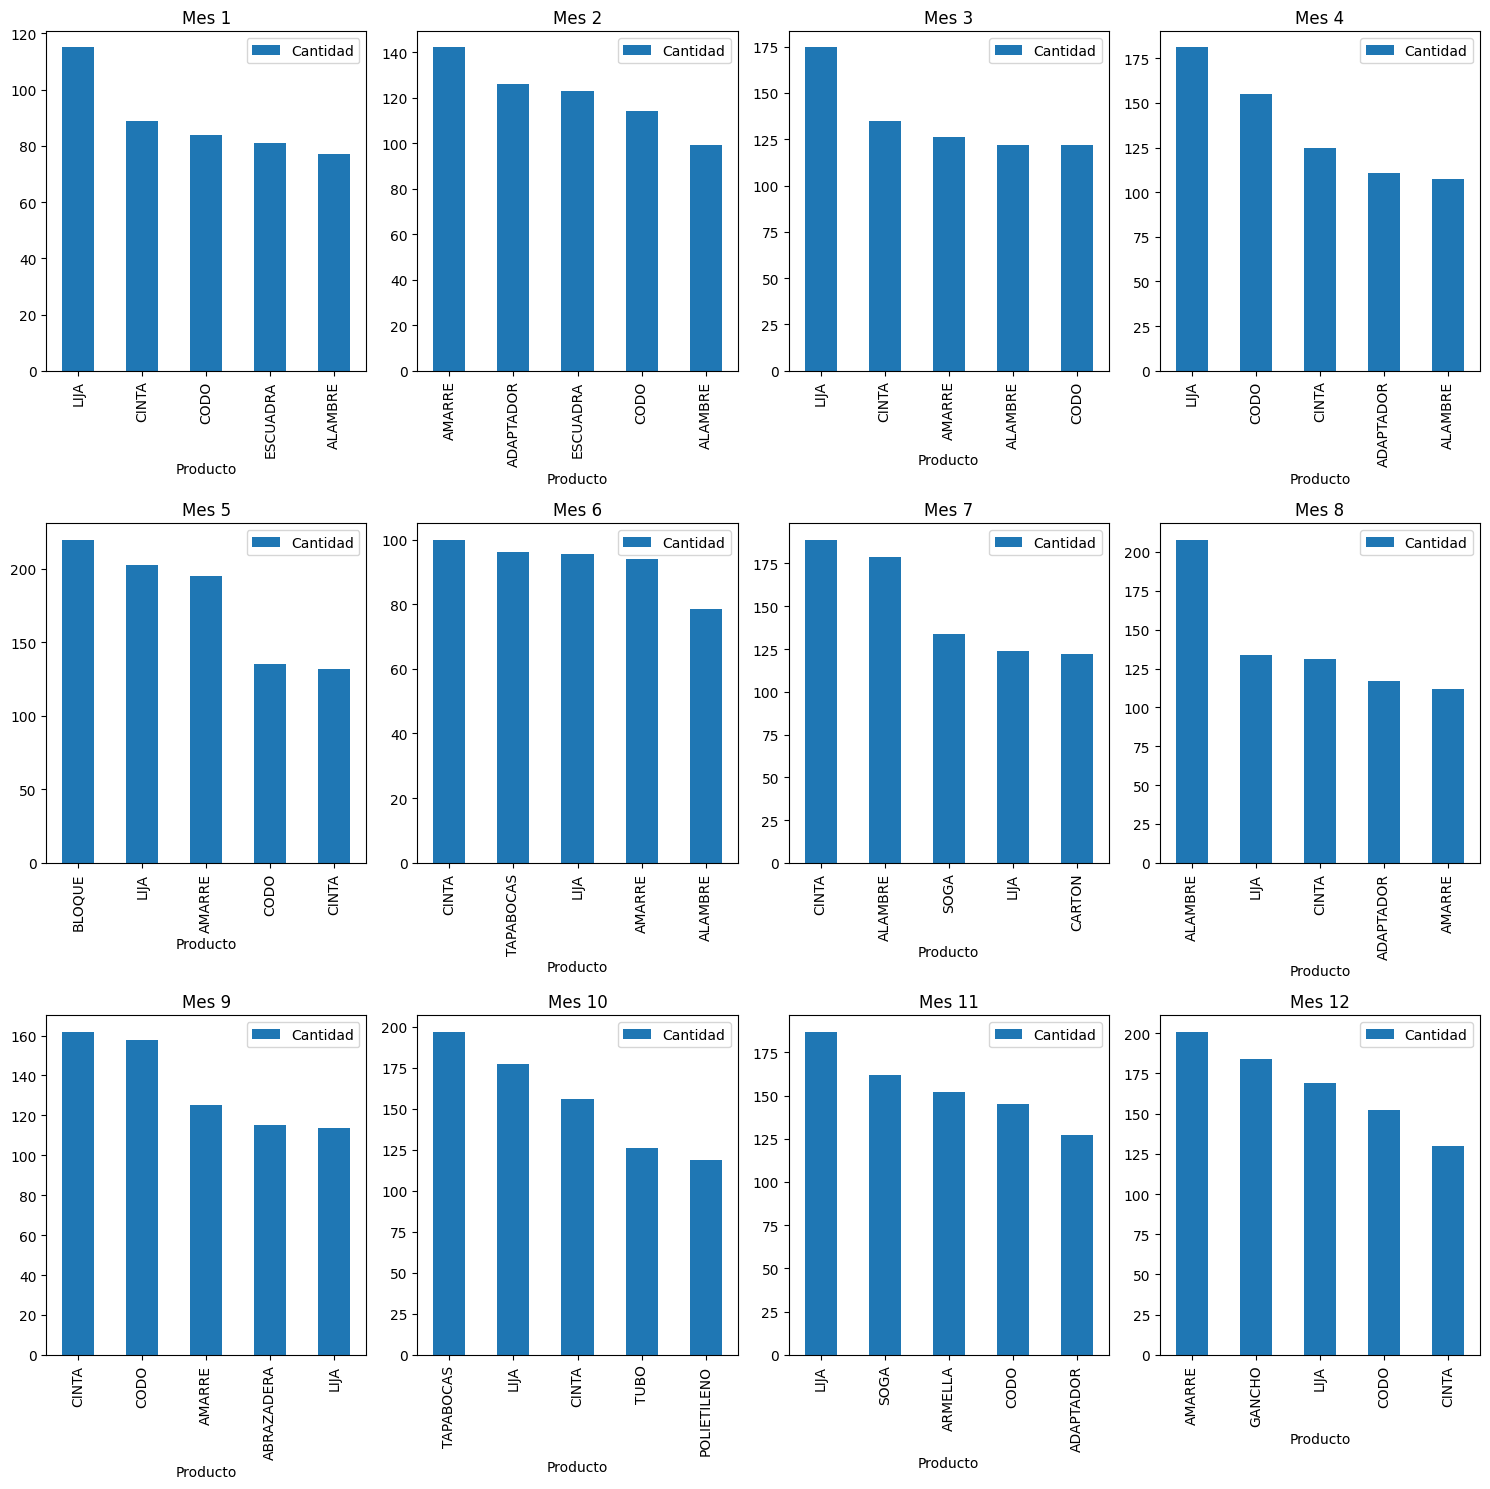

In [17]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[(info['month'] == month) & (info['year'] == 2019)] \
    .groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True, True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Mes {month}')
    i+=1

plt.tight_layout()

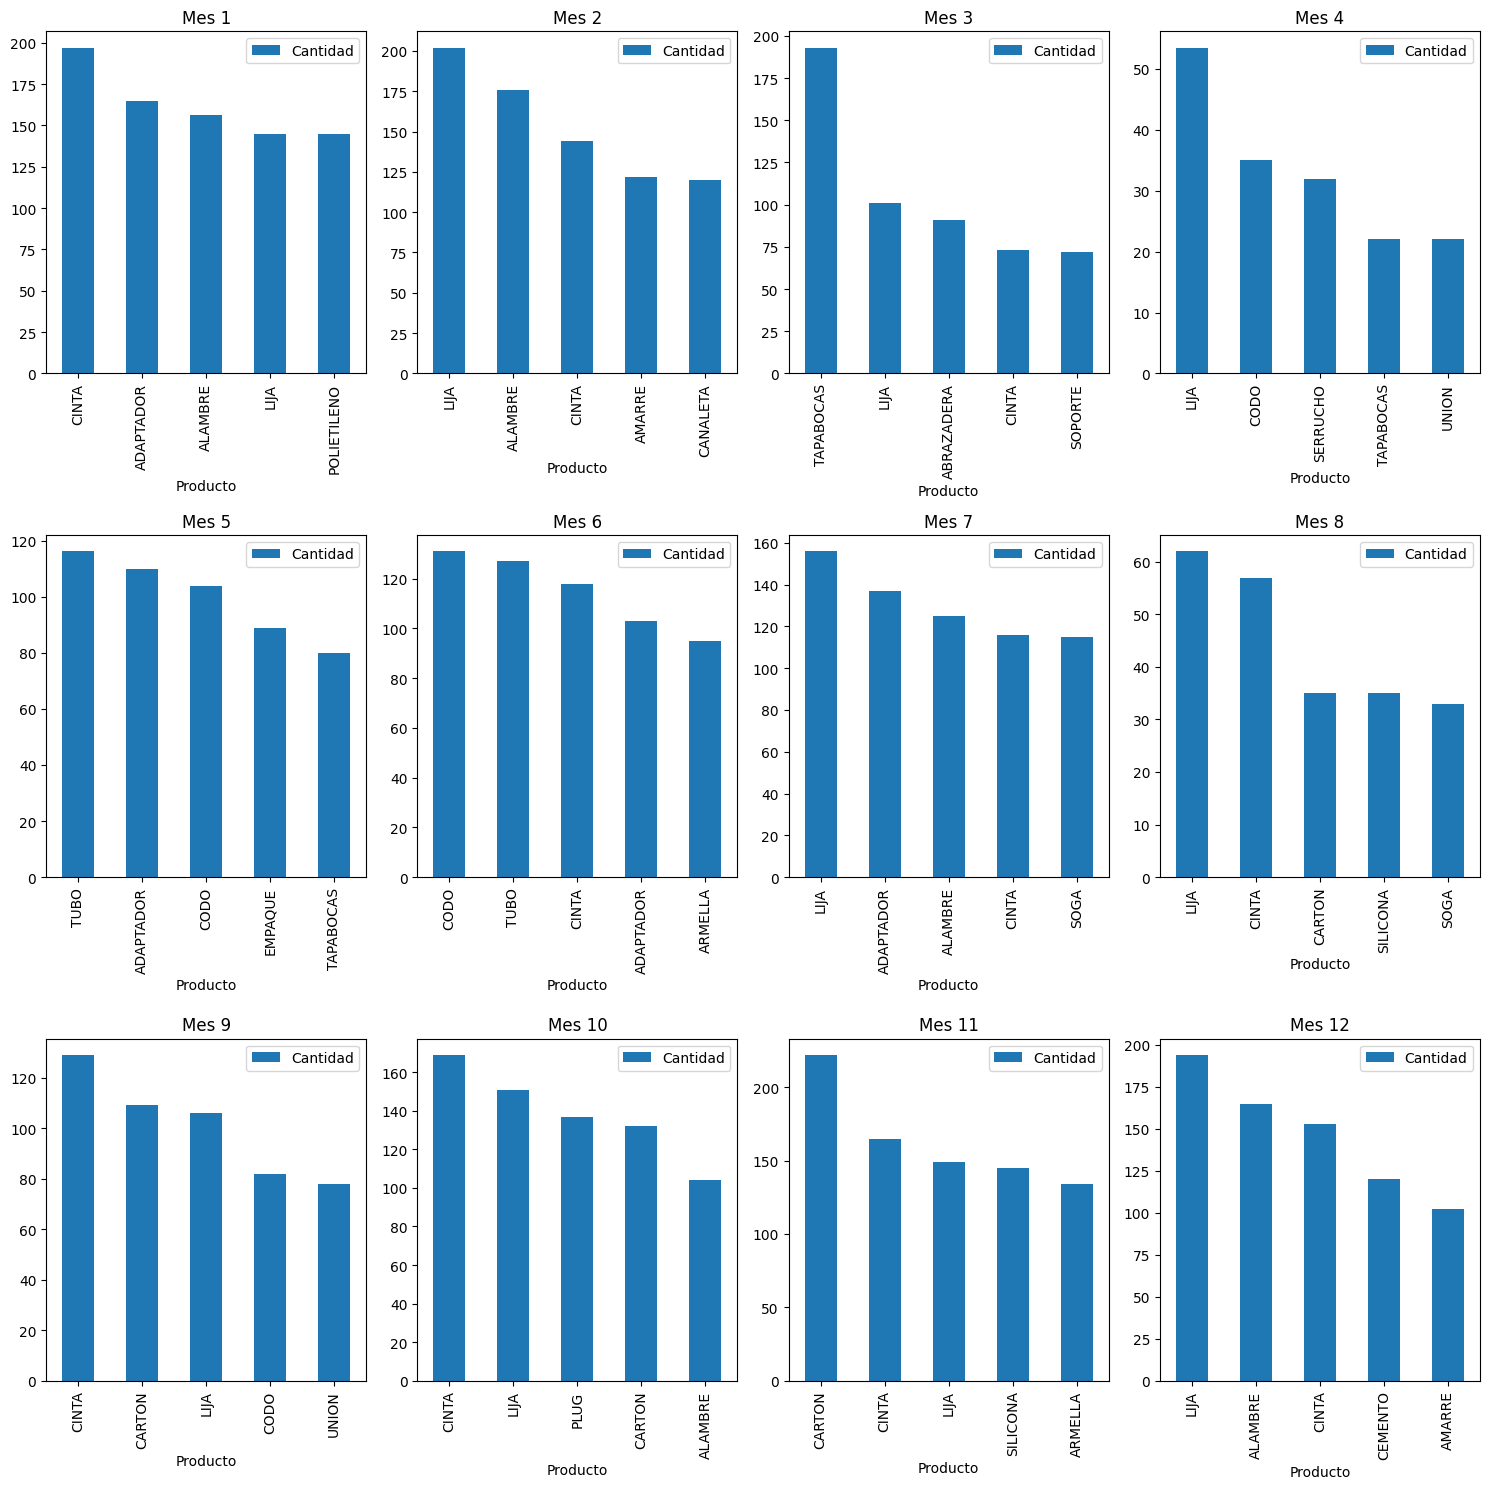

In [18]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[(info['month'] == month) & (info['year'] == 2020)] \
    .groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True, True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Mes {month}')
    i+=1

plt.tight_layout()

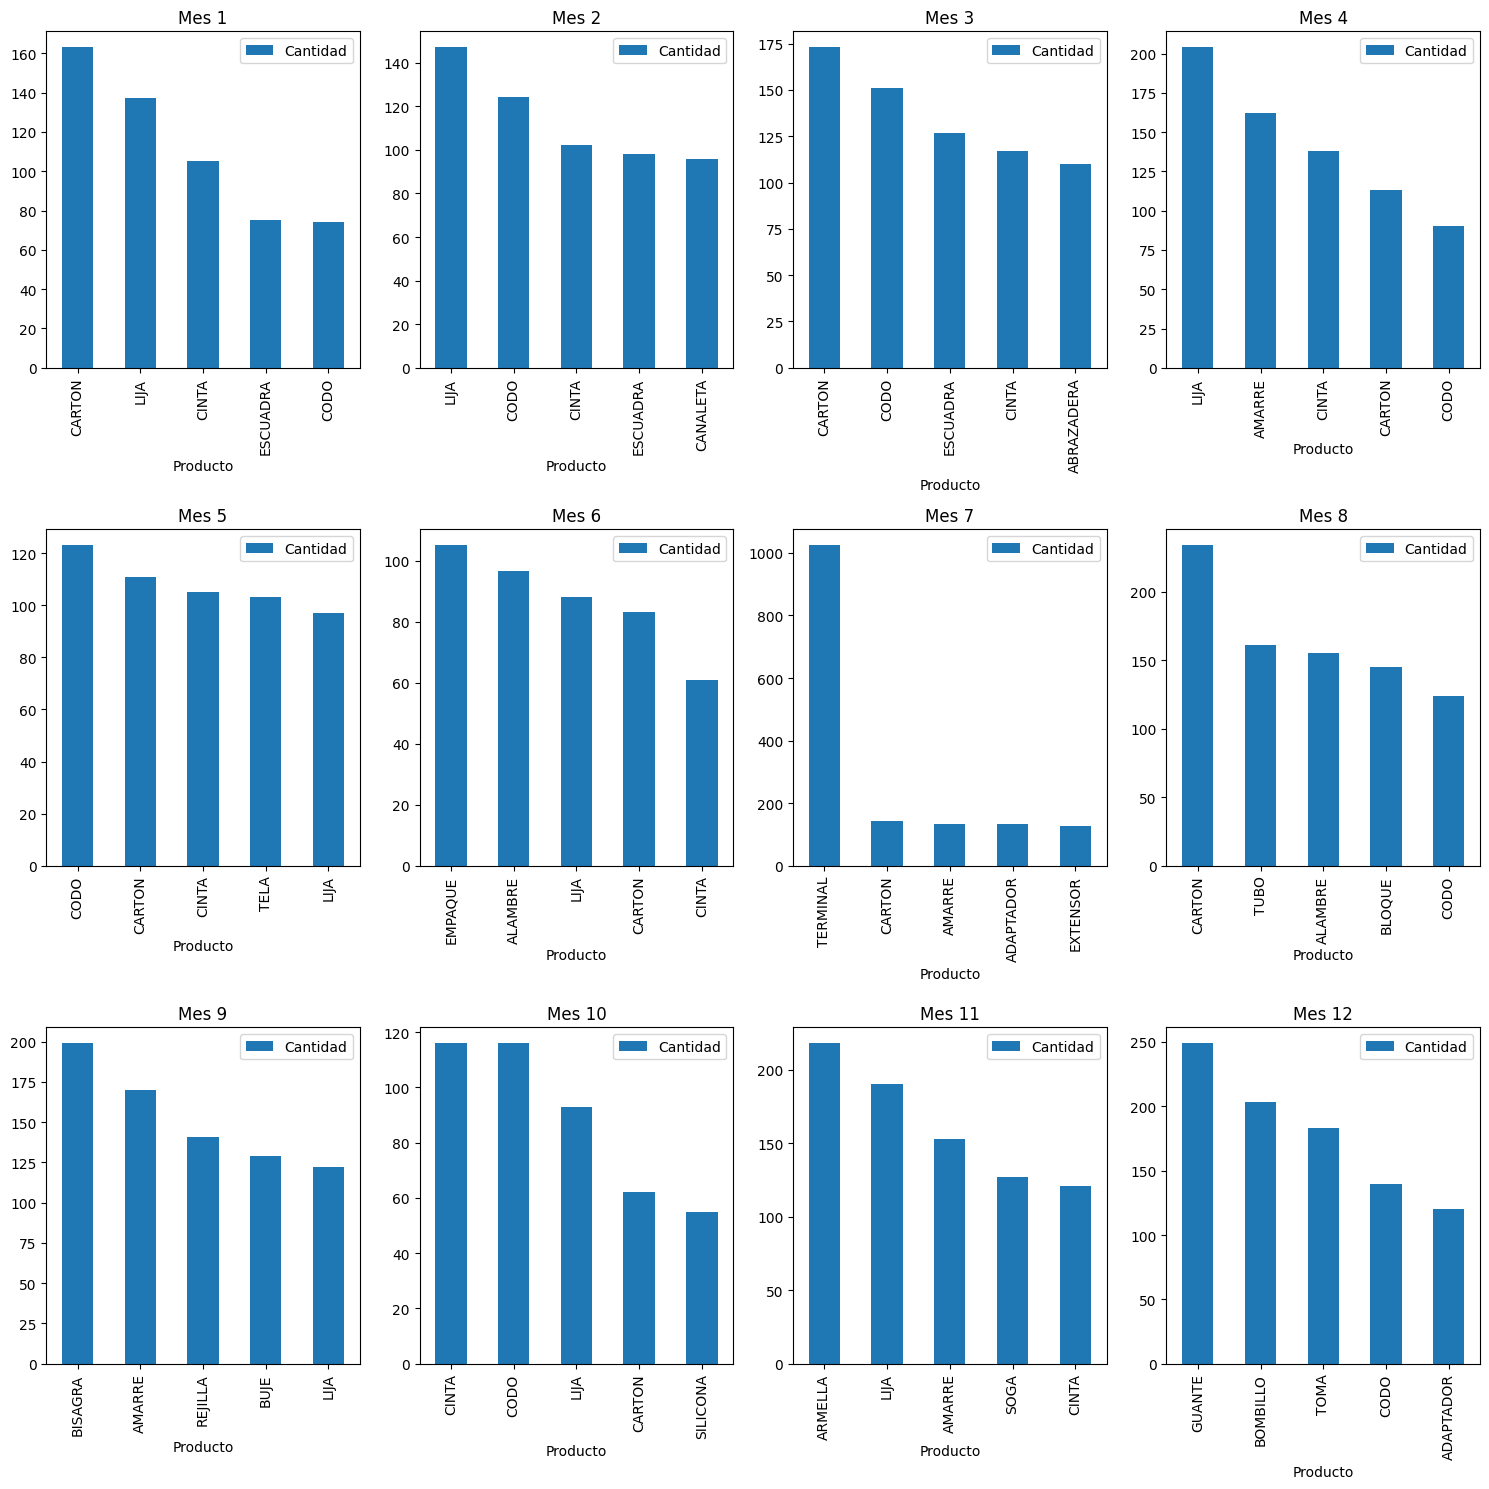

In [19]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[(info['month'] == month) & (info['year'] == 2021)] \
    .groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True, True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Mes {month}')
    i+=1

plt.tight_layout()

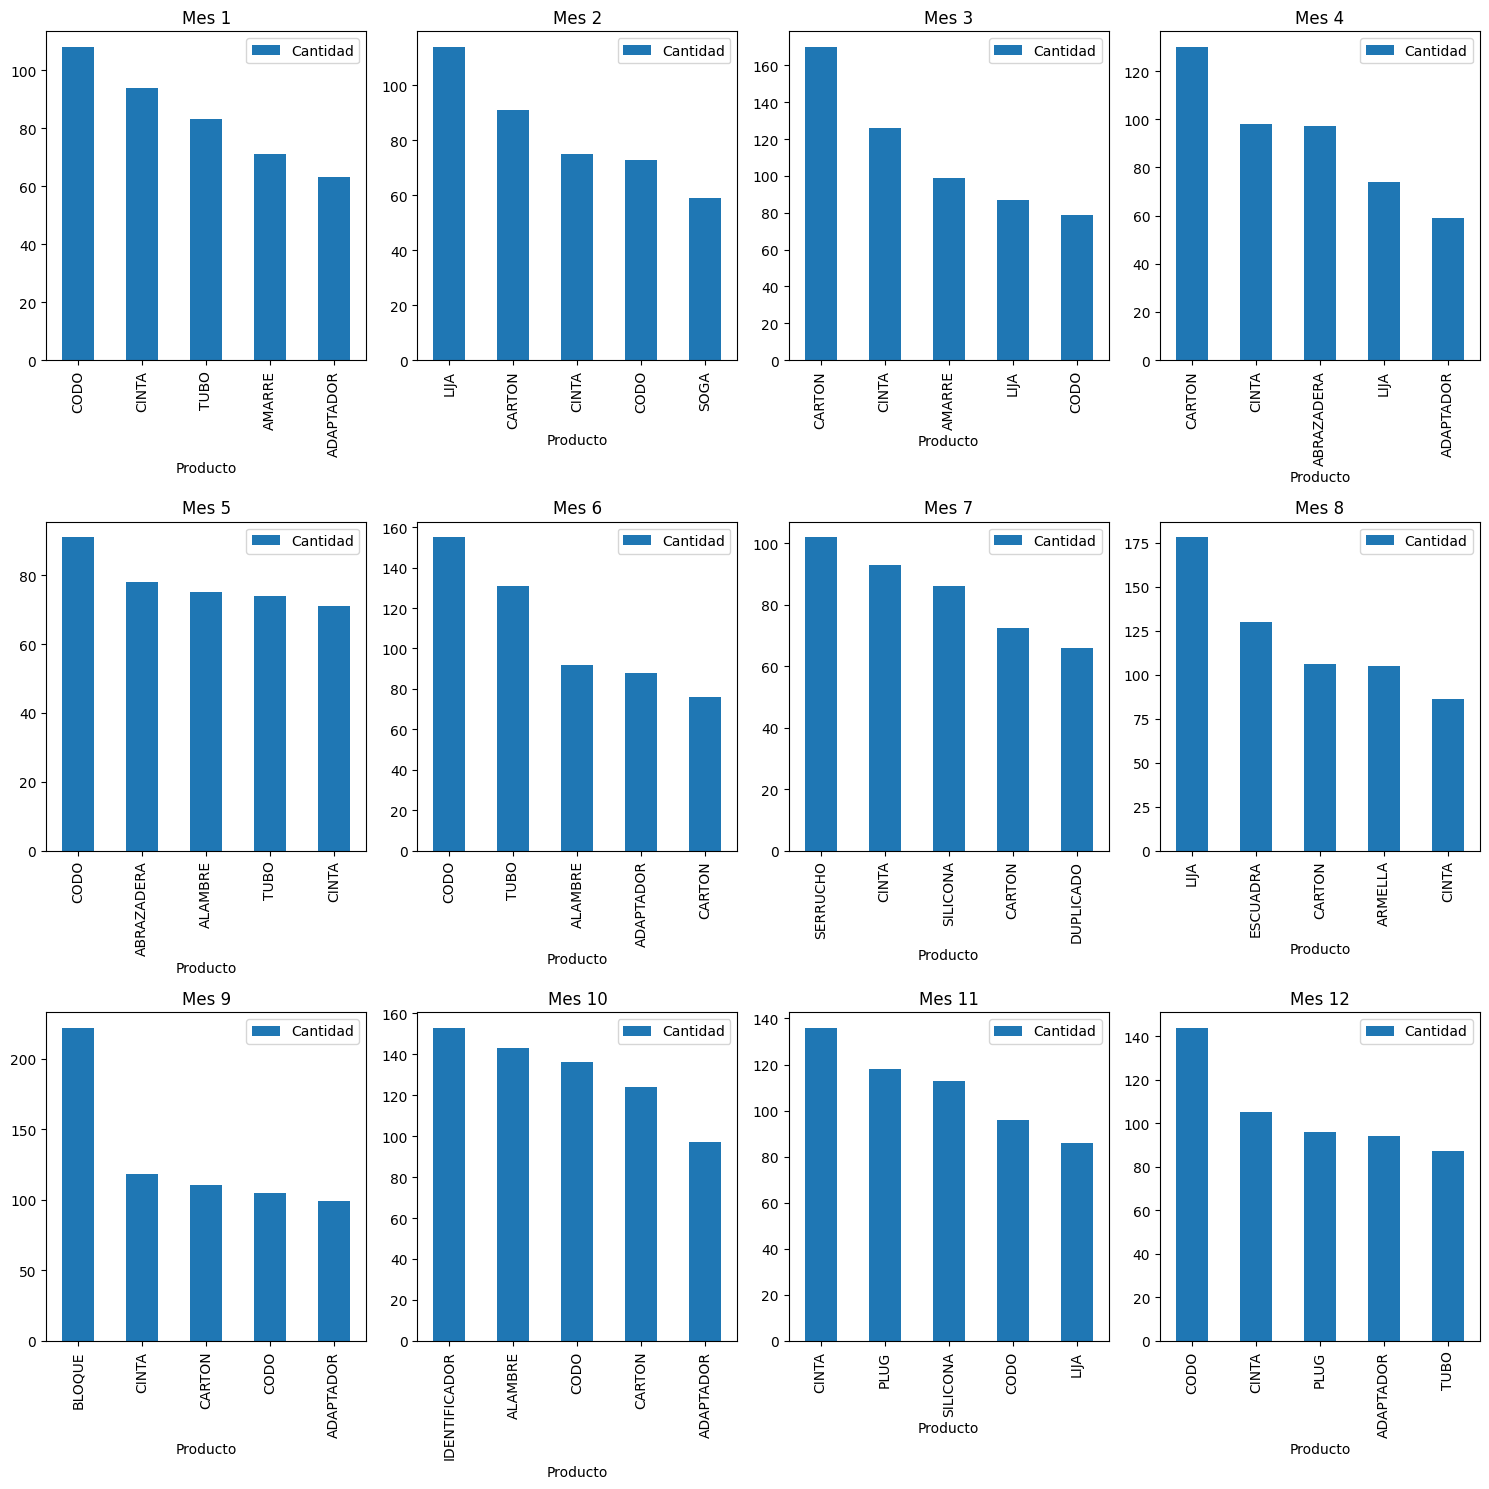

In [20]:
top5 = []
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axe = axes.ravel()
i= 0
for month in info['month'].unique():
    top = info[(info['month'] == month) & (info['year'] == 2022)] \
    .groupby(['year', 'month','Producto'])['Cantidad'].sum().reset_index() \
    .sort_values(['year','month','Cantidad'], ascending=[True, True, False])[['Producto', 'Cantidad']].head(5) 
    top.index=top['Producto']
    top.plot(kind="bar", ax=axe[i], title=f'Mes {month}')
    i+=1

plt.tight_layout()